In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.linear_model import LinearRegression

colours = {
    'cucumbers': 'palegreen',
    'guitars': 'peru',
    'slingshots': 'violet',
    'stocks': 'tomato',
    'sugar': 'palegoldenrod',
    'water': 'skyblue',
    'tranquillity': 'pink'
}
# Load data
df = pd.read_csv('spiff_data.csv')

# Clean/reformat dataframe
df.rename(columns={'gurkor':'cucumbers'}, inplace=True)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.replace(1000.0, np.nan)

# Save the cleaned dataframe to a new CSV file
df.to_csv('spiff_data_cleaned.csv', index=False)

In [21]:
df.head()

day  cucumbers   guitars  slingshots     stocks     sugar     water  \
0  1.0   6.154653  2.794285    2.136536  10.653684  3.324896  3.896149   
1  2.0   6.189623  2.843068    2.113582  10.674465  3.355736  3.899915   
2  3.0   6.168641  2.839644    2.116336  10.822372  3.336461  3.897404   
3  4.0   6.156401  2.823384    2.096137  10.848804  3.288274  3.901170   
4  5.0   6.124929  2.832798    2.099810  10.860731  3.303694  3.905355   

   tranquillity  
0      7.755880  
1      7.781310  
2      7.886205  
3      7.848061  
4      7.883026

In [22]:
# Zero lag correlation matrix

# NaN-aware lag-0 Pearson correlation
def nan_corr(x, y):
    mask = ~np.isnan(x) & ~np.isnan(y)
    if mask.sum() == 0:
        return np.nan  # No overlap
    return np.corrcoef(x[mask], y[mask])[0, 1]

# Compute the full lag-0 correlation matrix
cols = df.columns
n = len(cols)
corr_matrix = pd.DataFrame(index=cols, columns=cols, dtype=float)

for i in range(n):
    for j in range(n):
        corr_matrix.iloc[i, j] = nan_corr(df.iloc[:, i].values,
                                          df.iloc[:, j].values)

# Display
corr_matrix

day  cucumbers   guitars  slingshots    stocks     sugar  \
day           1.000000   0.951063  0.412800    0.813216 -0.647273 -0.689951   
cucumbers     0.951063   1.000000  0.238487    0.753631 -0.512937 -0.681986   
guitars       0.412800   0.238487  1.000000    0.614809 -0.620228 -0.040941   
slingshots    0.813216   0.753631  0.614809    1.000000 -0.496959 -0.279750   
stocks       -0.647273  -0.512937 -0.620228   -0.496959  1.000000  0.523070   
sugar        -0.689951  -0.681986 -0.040941   -0.279750  0.523070  1.000000   
water         0.961499   0.970707  0.397039    0.822367 -0.628170 -0.677335   
tranquillity  0.642327   0.530684  0.383696    0.745368 -0.283928 -0.096623   

                 water  tranquillity  
day           0.961499      0.642327  
cucumbers     0.970707      0.530684  
guitars       0.397039      0.383696  
slingshots    0.822367      0.745368  
stocks       -0.628170     -0.283928  
sugar        -0.677335     -0.096623  
water         1.000000      0.521905  
tranquillity  0.521905      1.000000

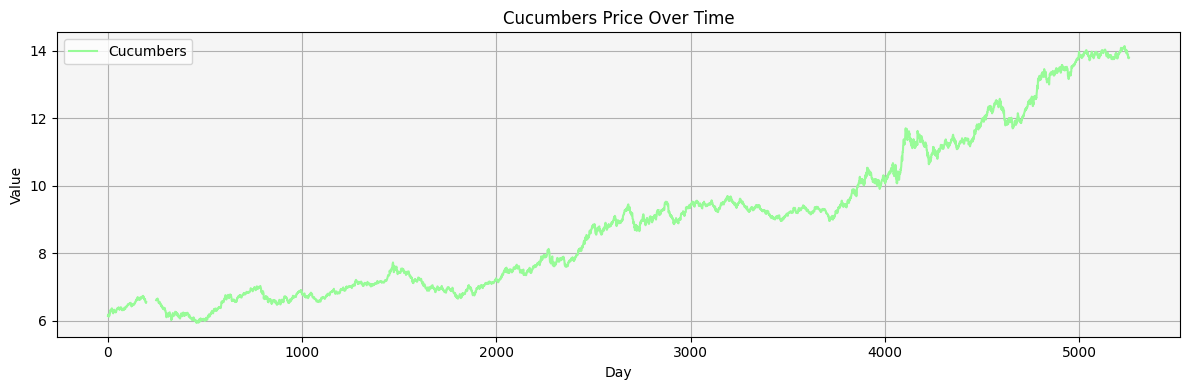

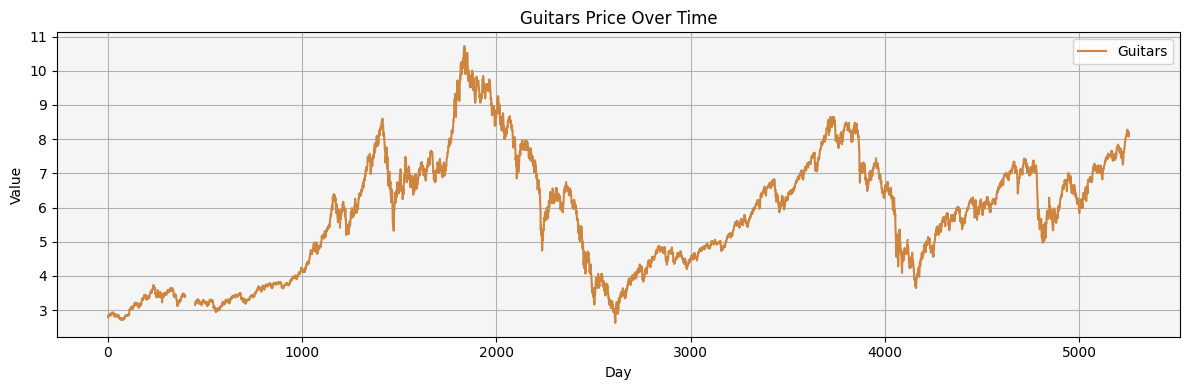

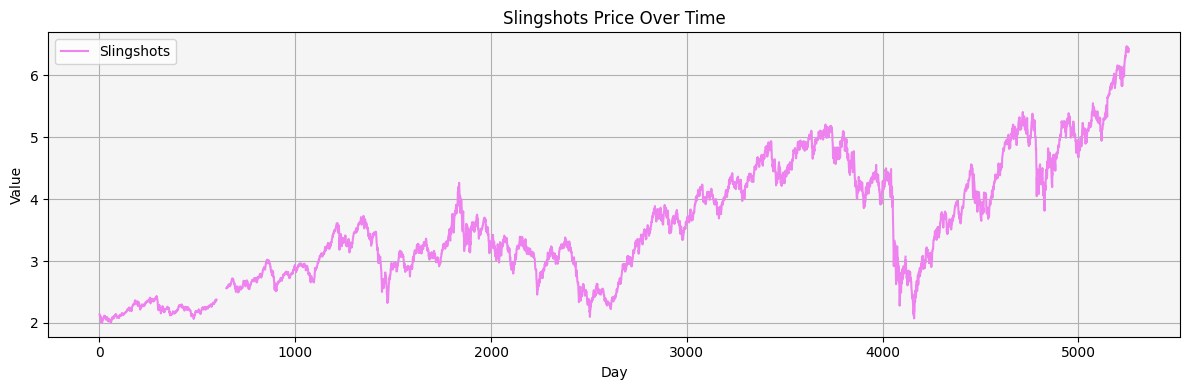

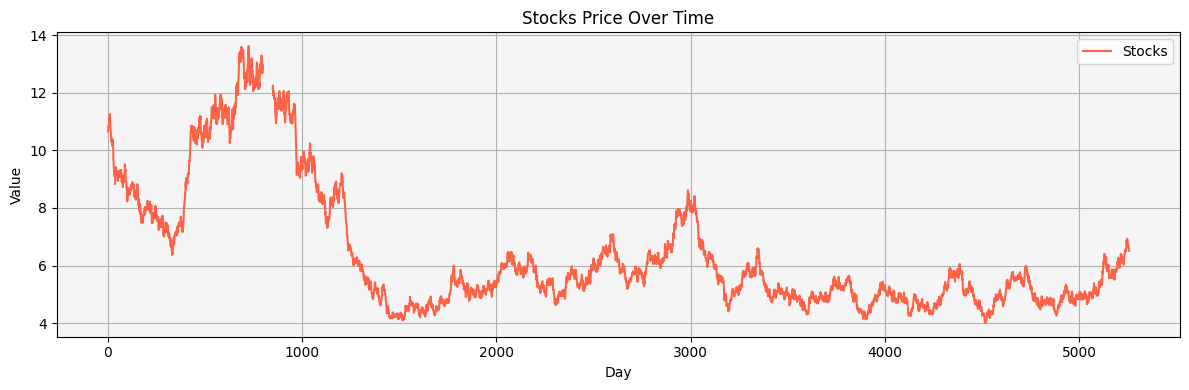

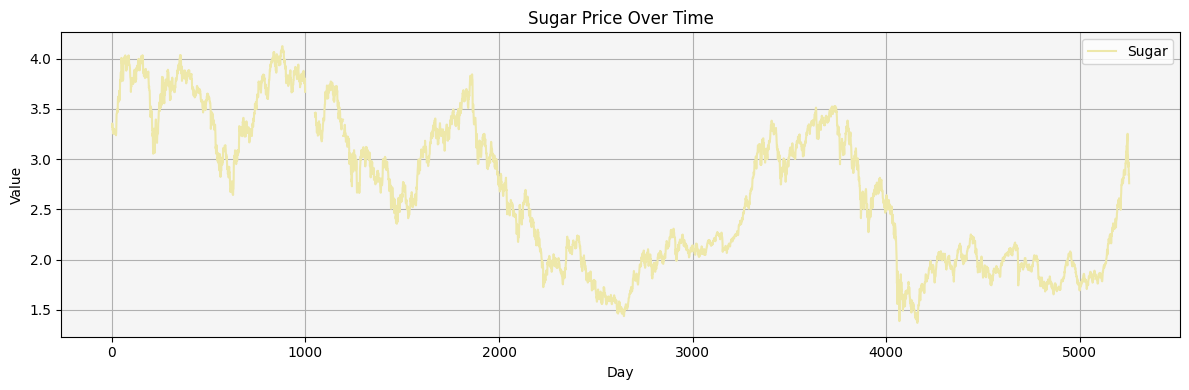

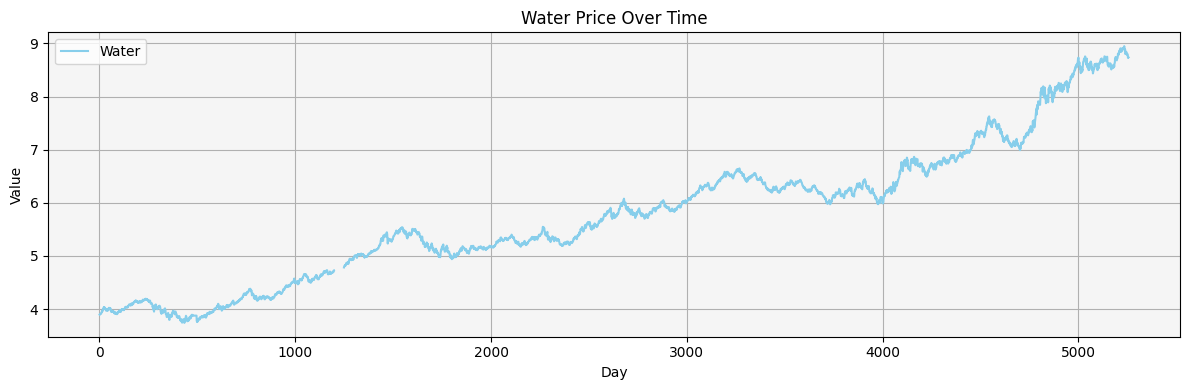

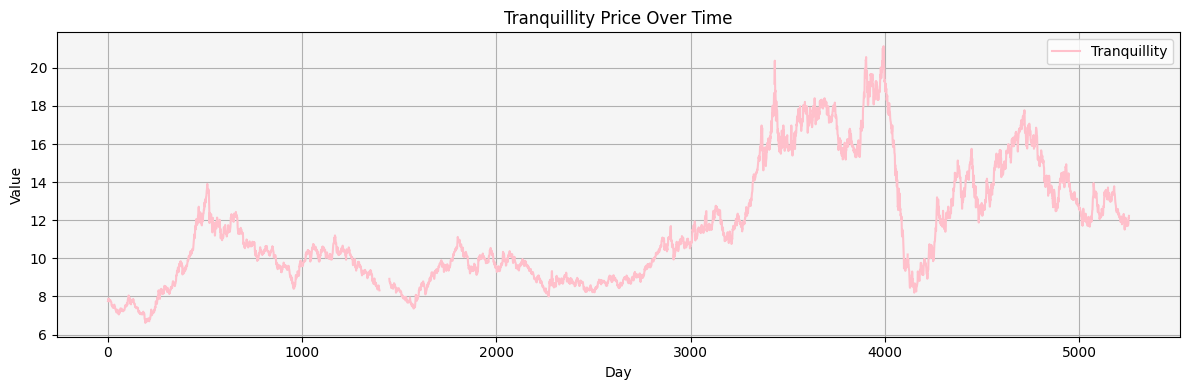

In [23]:
# Create a separate plot for each column
for column, color in colours.items():
    plt.figure(figsize=(12, 4))
    plt.plot(df['day'], df[column], color=color, label=column.capitalize())
    plt.title(f'{column.capitalize()} Price Over Time')
    plt.xlabel('Day')
    plt.ylabel('Value')
    plt.grid(True)
    plt.gca().set_facecolor("whitesmoke")
    plt.legend()
    plt.tight_layout()
    plt.show()

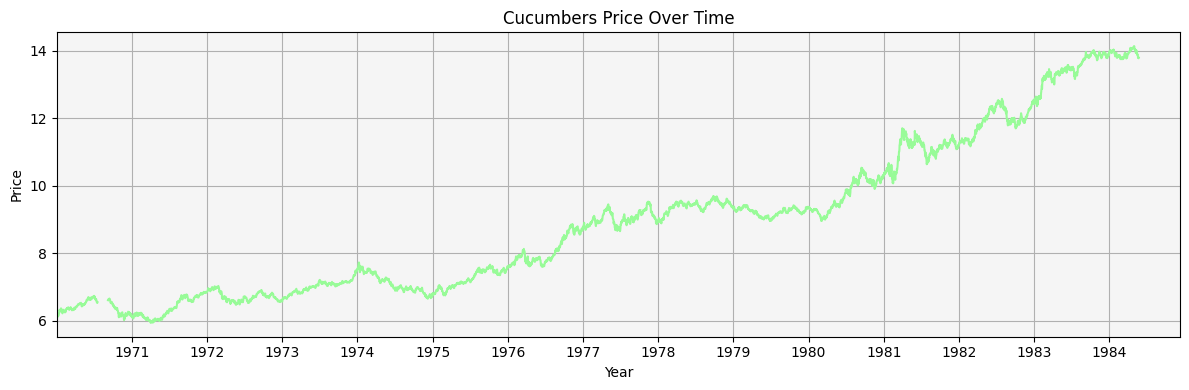

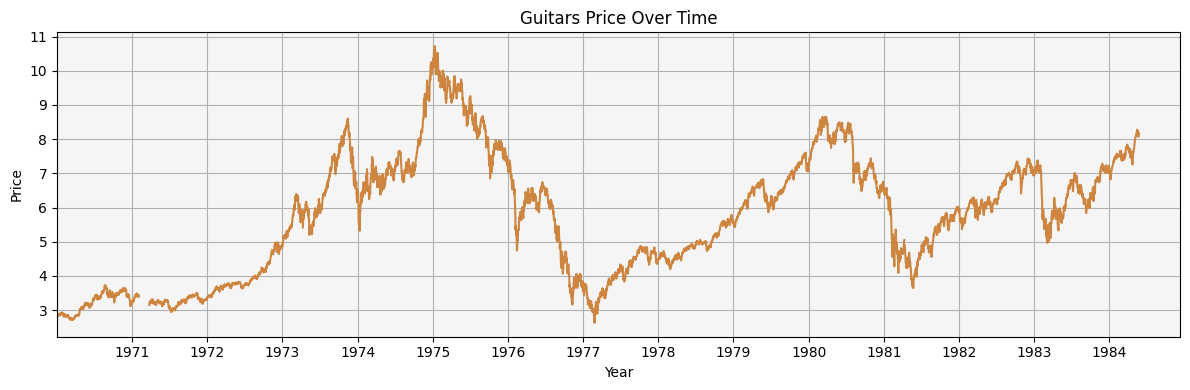

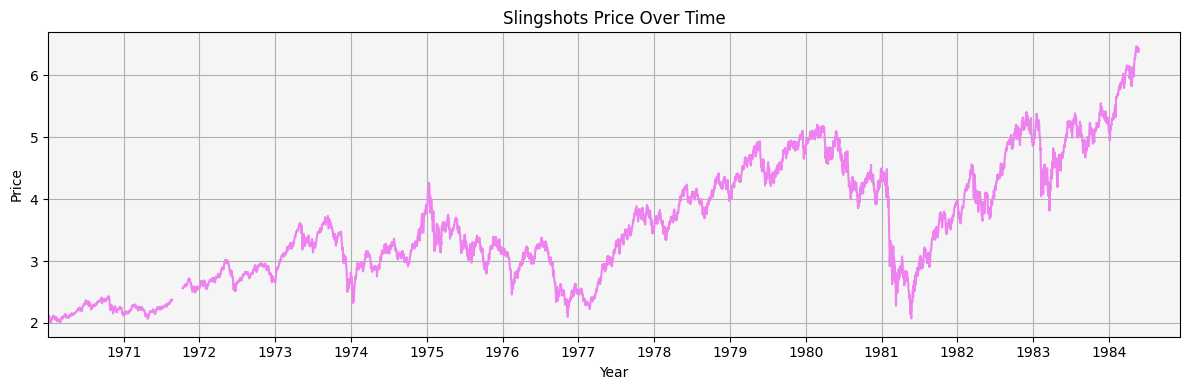

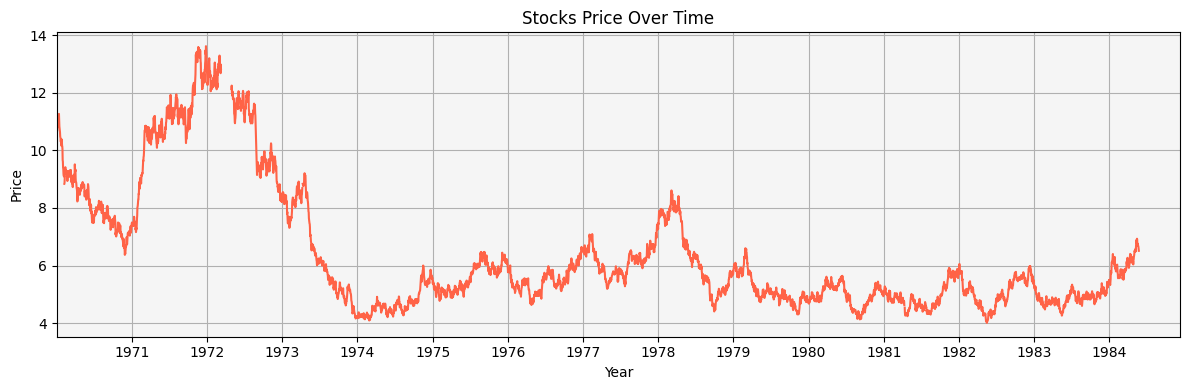

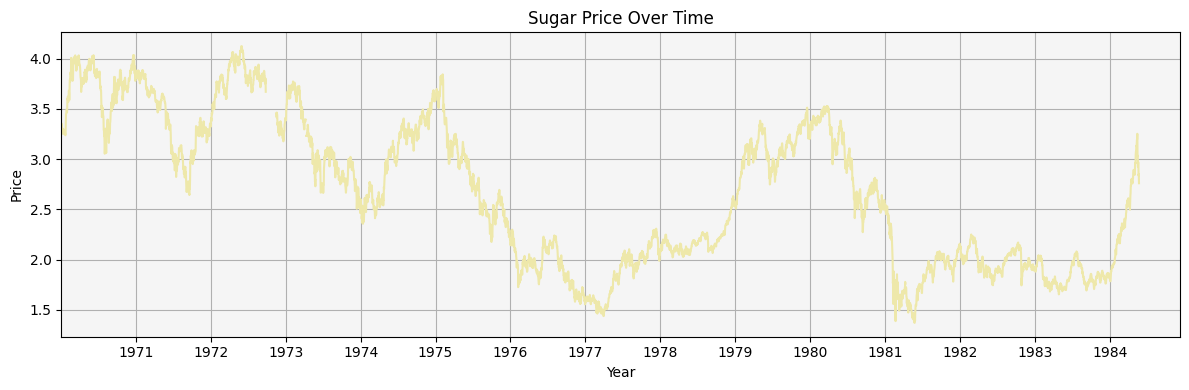

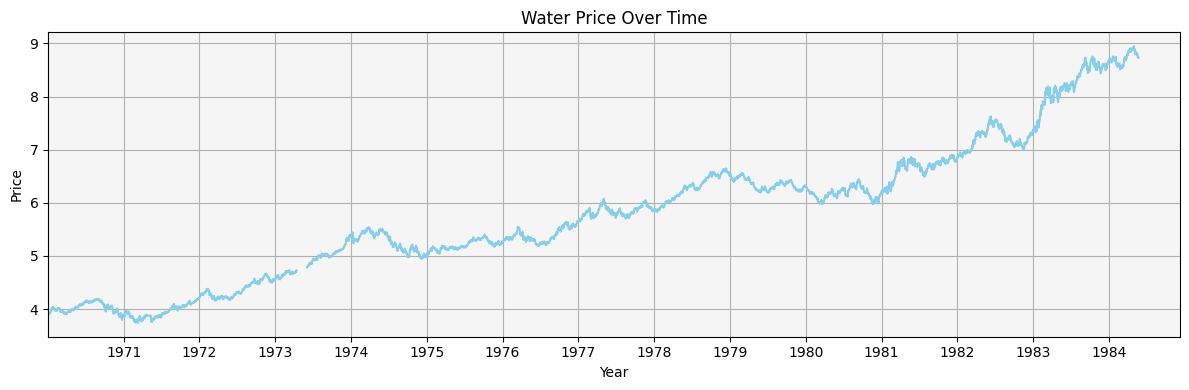

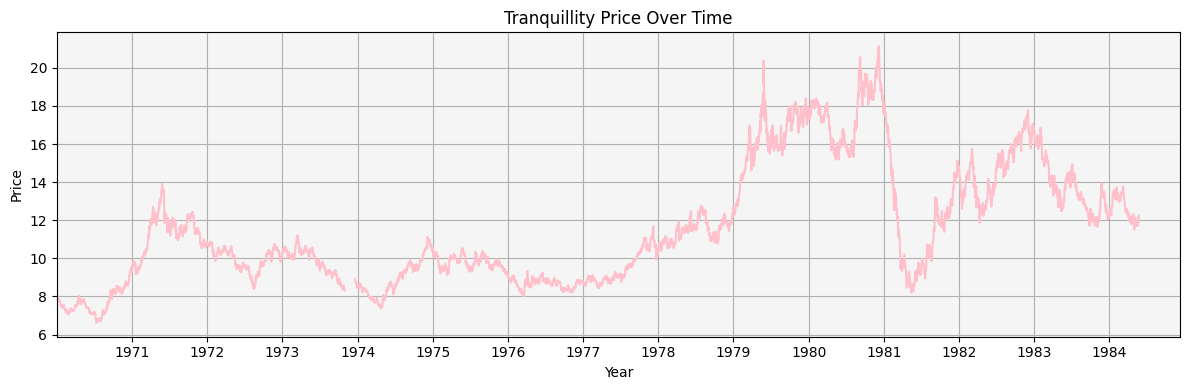

In [24]:
# Load and prepare data
dft = pd.read_csv("spiff_data.csv")
dft.rename(columns={'gurkor': 'cucumbers'}, inplace=True)

# Convert 'day' to datetime (if needed)
dft['day'] = pd.to_datetime(dft['day'], errors='coerce')

# Keep 'day' and other useful columns
dft_clean = dft.drop(columns=["Unnamed: 0"])
dft_clean = dft_clean.replace(1000.0, np.nan)
dft_clean.set_index('day', inplace=True)

# Color dictionary
colours = {
    'cucumbers': 'palegreen',
    'guitars': 'peru',
    'slingshots': 'violet',
    'stocks': 'tomato',
    'sugar': 'palegoldenrod',
    'water': 'skyblue',
    'tranquillity': 'pink'
}

# Create a separate plot for each item
for column, color in colours.items():
    ax = dft_clean[[column]].plot(figsize=(12, 4), color=color, legend=False)
    ax.set_title(f'{column.capitalize()} Price Over Time')
    ax.set_xlabel('Year')
    ax.set_ylabel('Price')
    ax.grid(True)
    ax.set_facecolor("whitesmoke")

    # Format x-axis by year
    ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
    ax.xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())

    plt.tight_layout()
    plt.show()


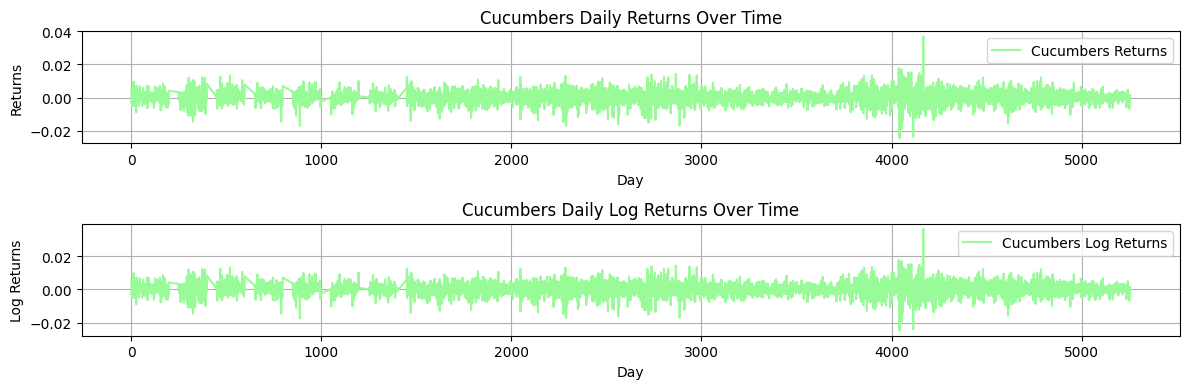

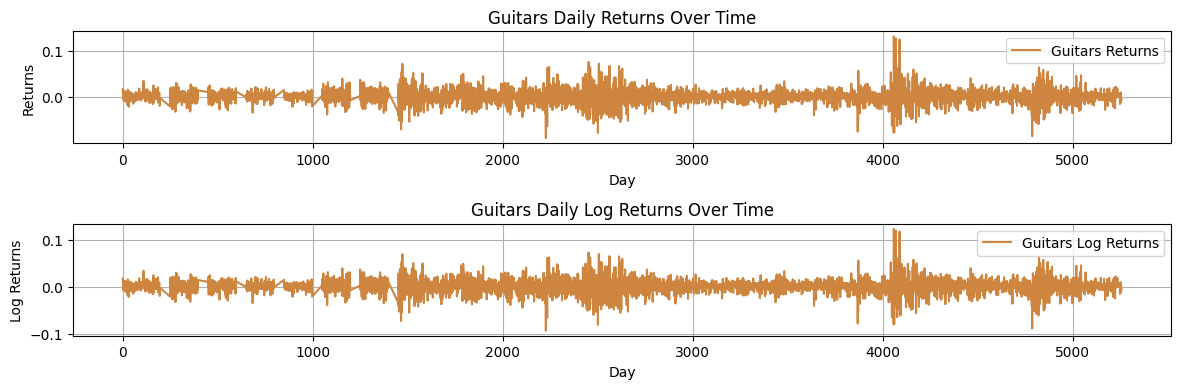

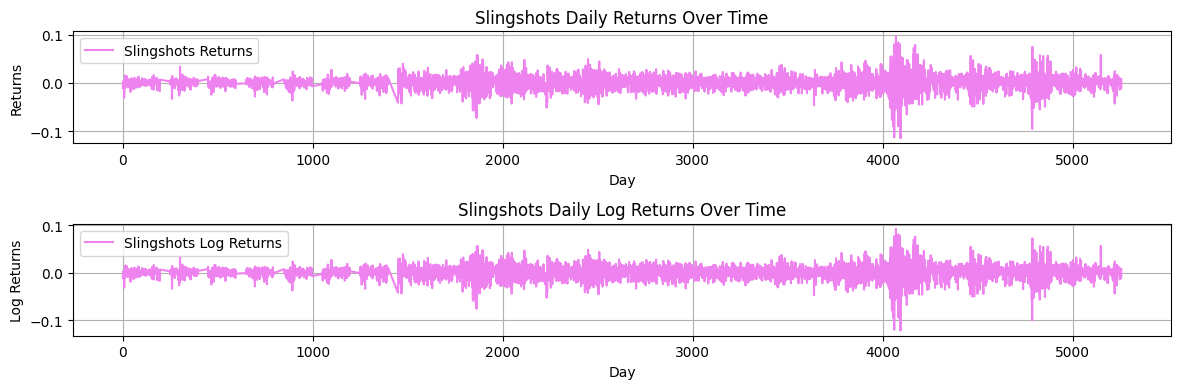

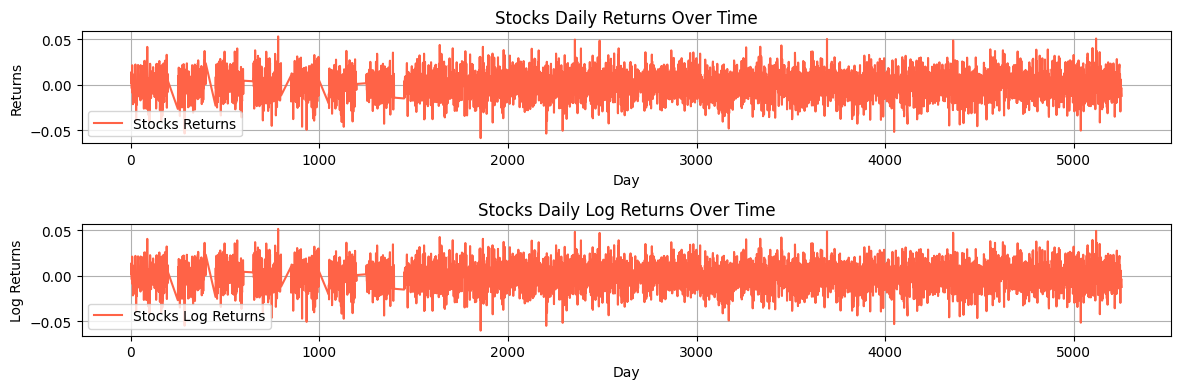

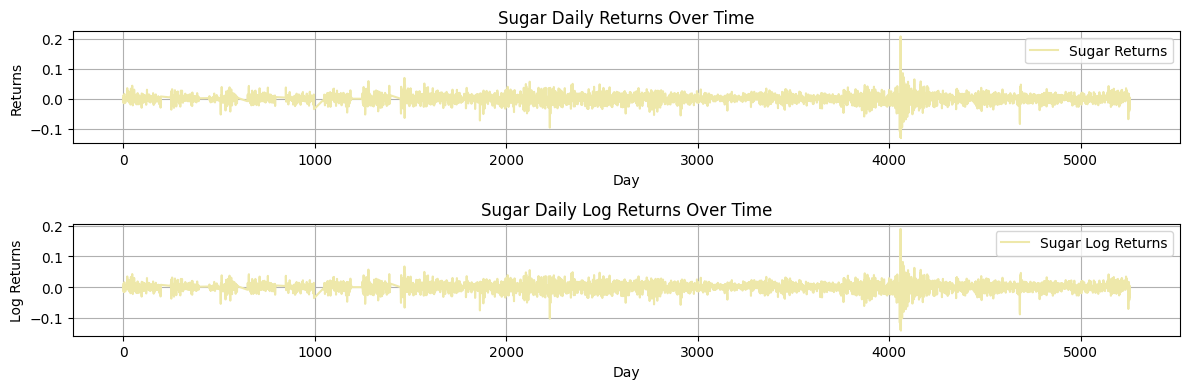

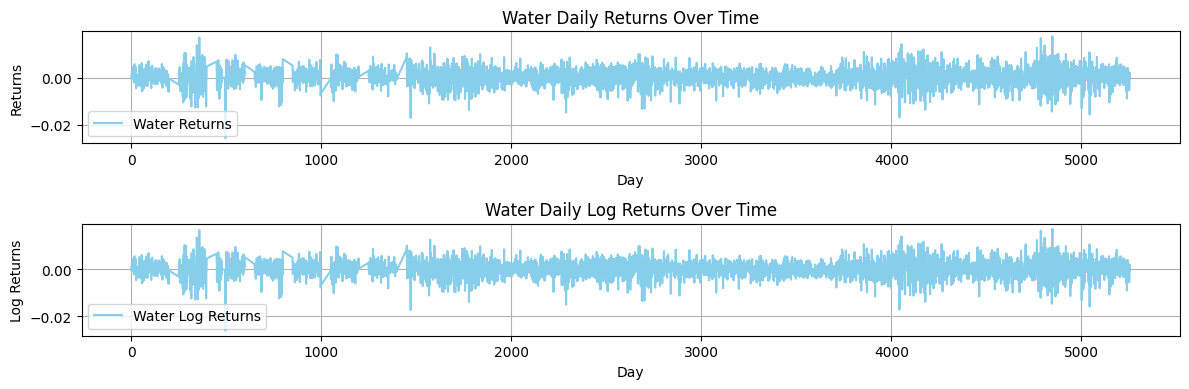

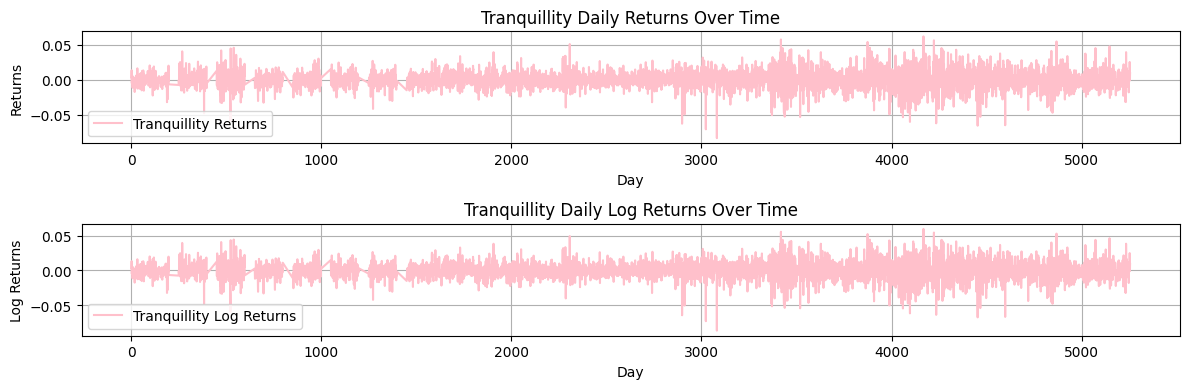

In [25]:
# Calculate daily returns and log returns for each column
returns = df[colours.keys()].pct_change(fill_method=None)  # Avoid deprecated default behavior
returns = returns.dropna()  # Drop NaN values after calculation

# Logarithmic returns
df_fixed = df[colours.keys()].replace(0, np.nan)  # Replace zeros with NaN to avoid division issues
log_returns = np.log(df_fixed / df_fixed.shift(1))  # Logarithmic returns
log_returns = log_returns.dropna()  # Drop NaN values

# Loop through each column for plotting
for column, color in colours.items():
    plt.figure(figsize=(12, 4))
    
    # Plot returns
    plt.subplot(2, 1, 1)
    plt.plot(returns[column], color=color, label=f'{column.capitalize()} Returns')
    plt.title(f'{column.capitalize()} Daily Returns Over Time')
    plt.xlabel('Day')
    plt.ylabel('Returns')
    plt.grid(True)
    plt.legend()

    # Plot log returns
    plt.subplot(2, 1, 2)
    plt.plot(log_returns[column], color=color, label=f'{column.capitalize()} Log Returns')
    plt.title(f'{column.capitalize()} Daily Log Returns Over Time')
    plt.xlabel('Day')
    plt.ylabel('Log Returns')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()


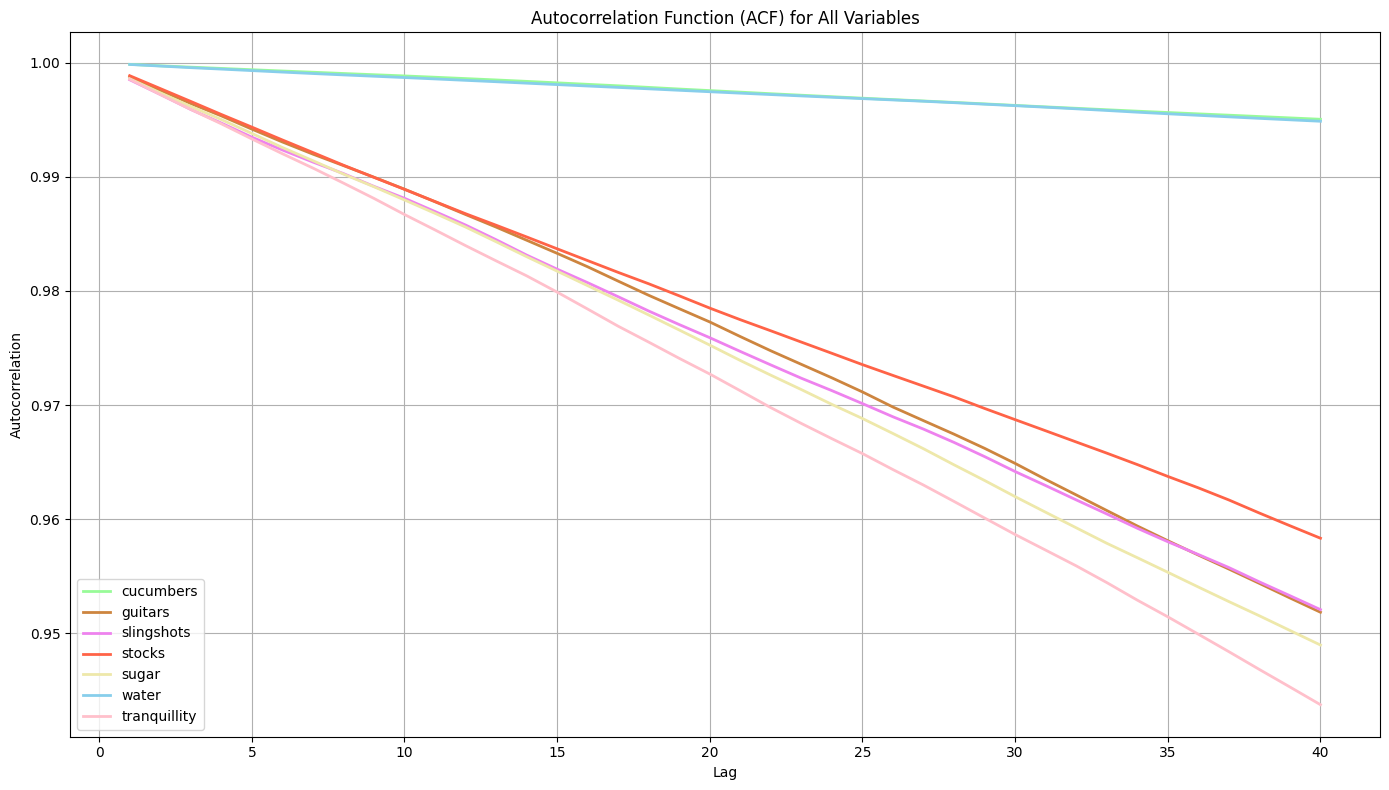

In [26]:
# Plot autocorrelations for all columns
plt.figure(figsize=(14, 8))
max_lag = 40

for i, column in enumerate(colours.keys()):
    series = df[column].dropna()
    autocorrelations = [series.autocorr(lag) for lag in range(1, max_lag + 1)]
    plt.plot(range(1, max_lag + 1), autocorrelations, label=column, color=colours[column], linewidth=2)

plt.title('Autocorrelation Function (ACF) for All Variables')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

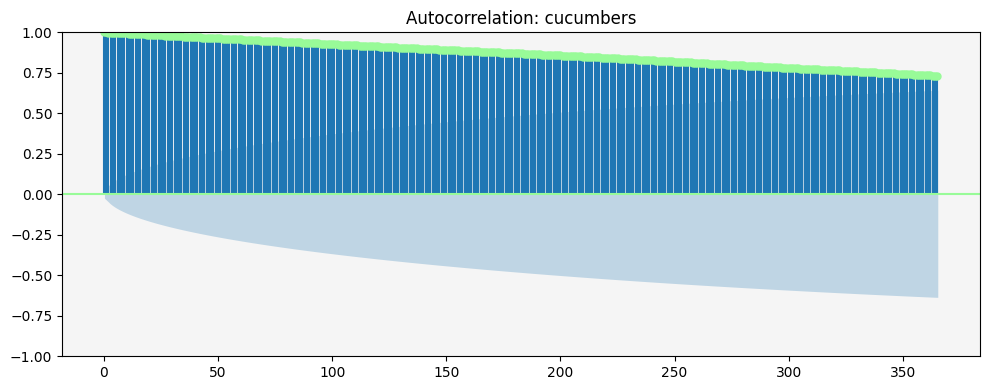

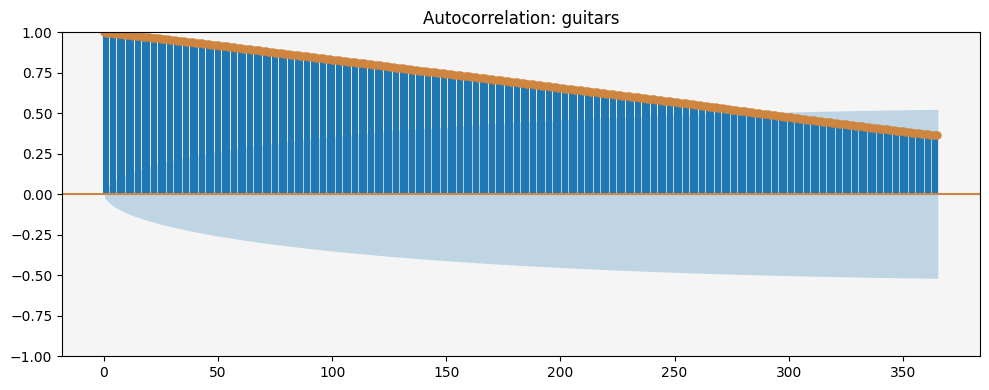

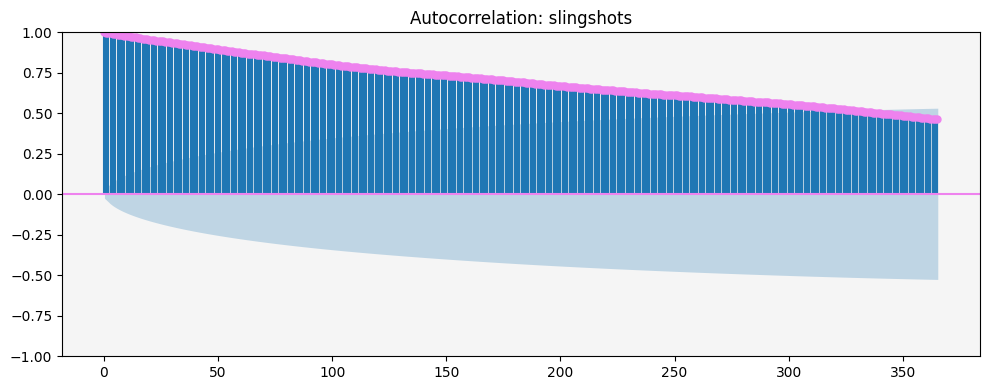

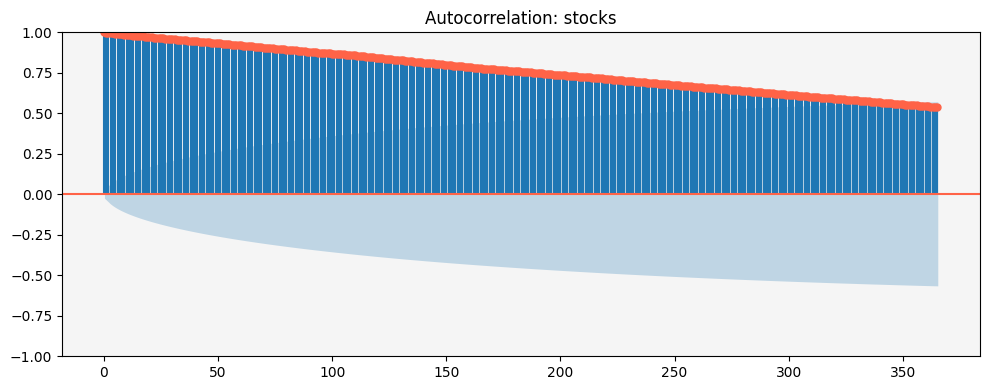

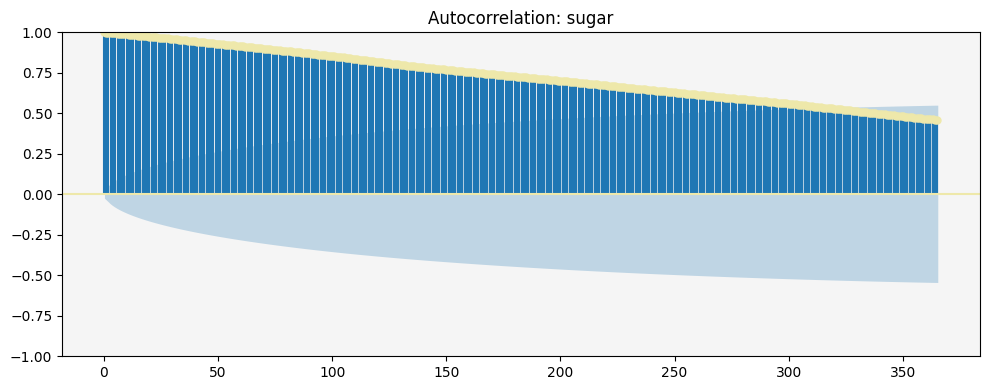

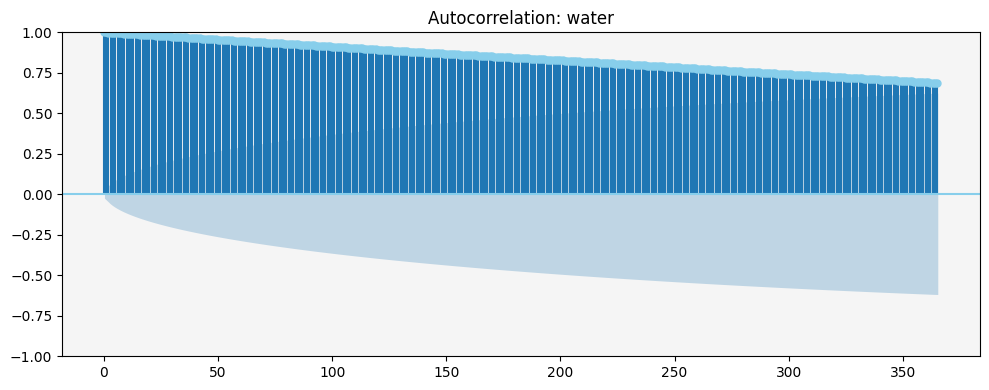

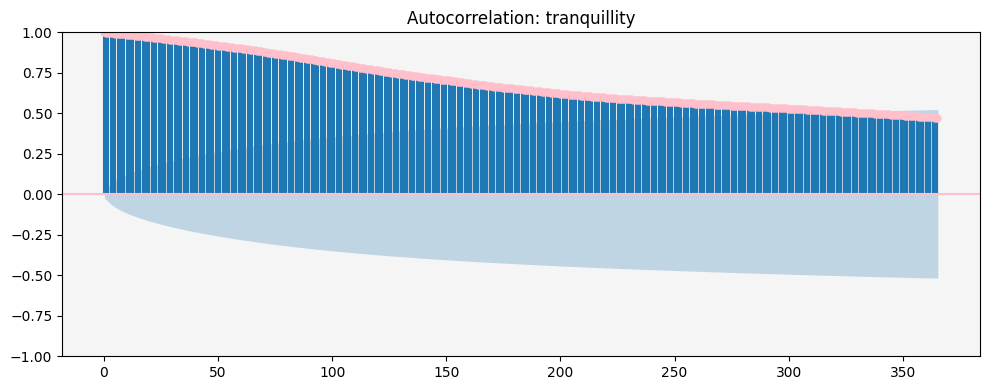

In [ ]:
# Create individual ACF plots
for column, color in colours.items():
    series = df[column].dropna()

    fig, ax = plt.subplots(figsize=(10, 4))
    plot_acf(series, lags=365, ax=ax, title=f"Autocorrelation: {column}", color=color)
    ax.set_facecolor("whitesmoke")
    plt.tight_layout()
    plt.show()


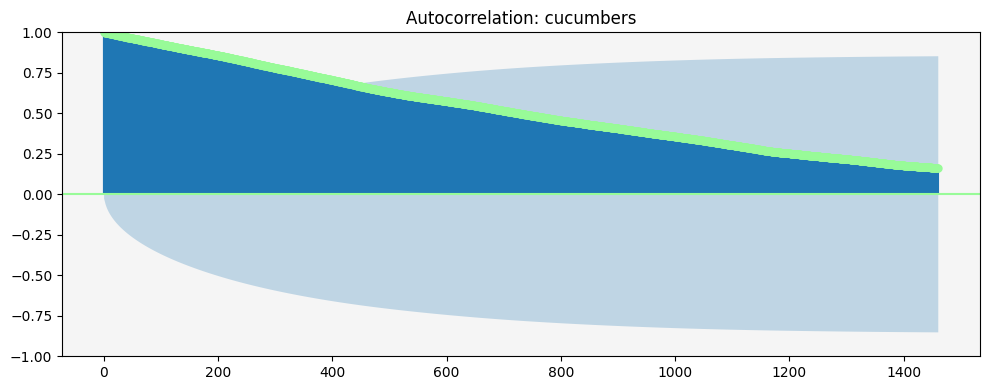

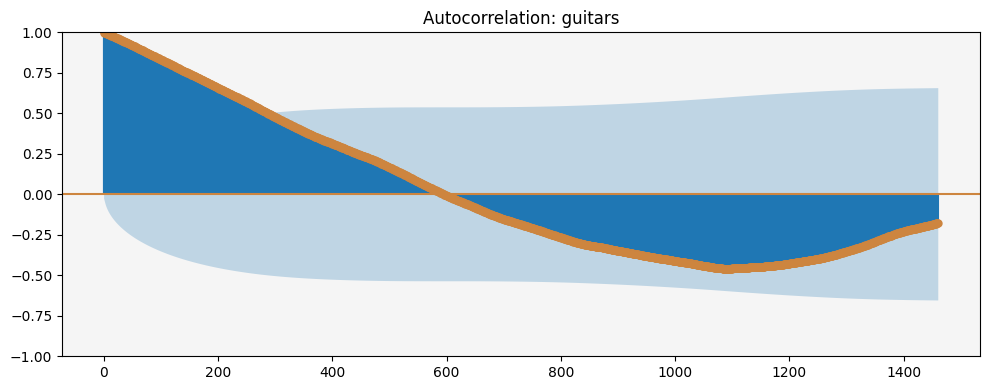

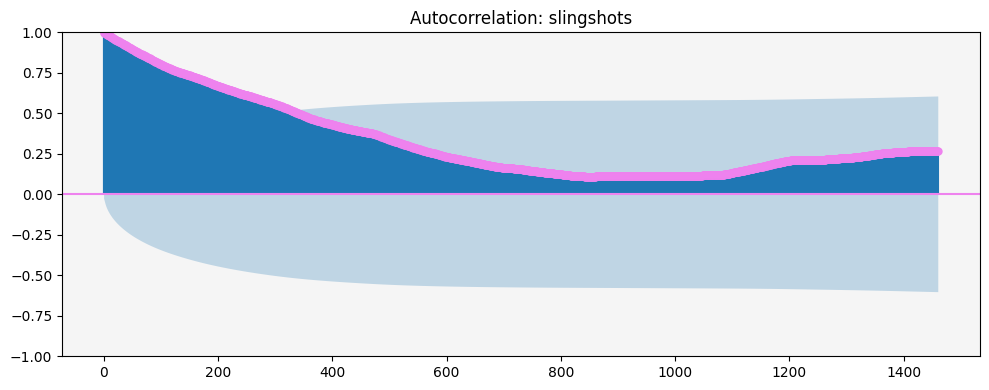

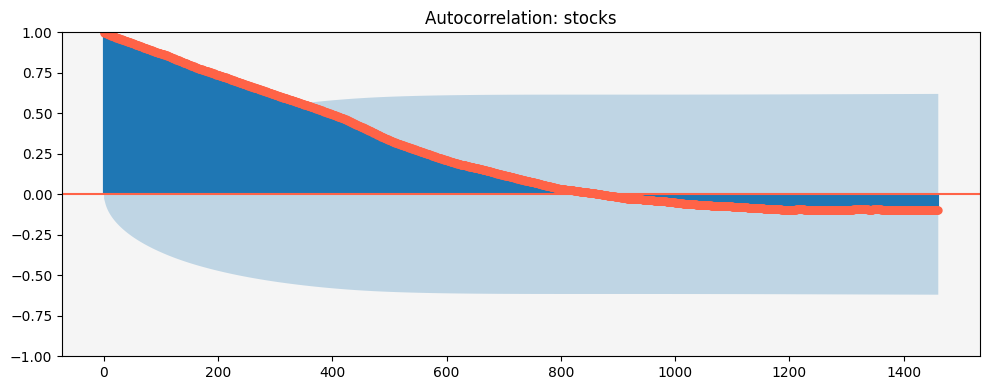

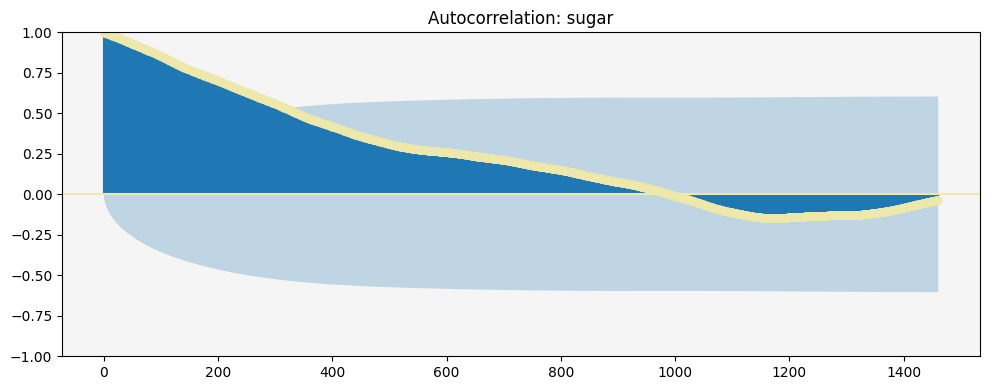

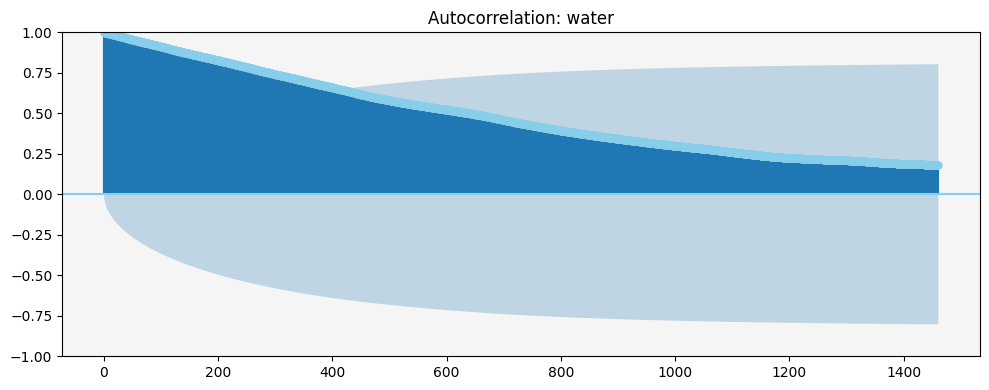

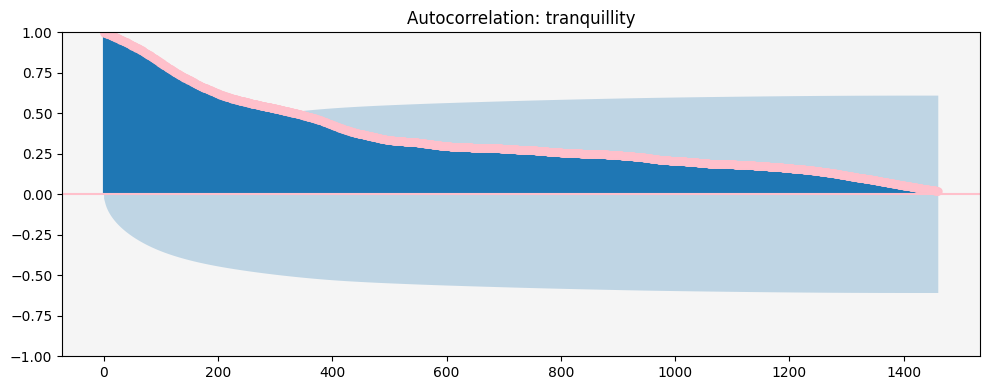

In [ ]:
# Create individual ACF plots
for column, color in colours.items():
    series = df[column].dropna()

    fig, ax = plt.subplots(figsize=(10, 4))
    plot_acf(series, lags=1460, ax=ax, title=f"Autocorrelation: {column}", color=color)
    ax.set_facecolor("whitesmoke")
    plt.tight_layout()
    plt.show()


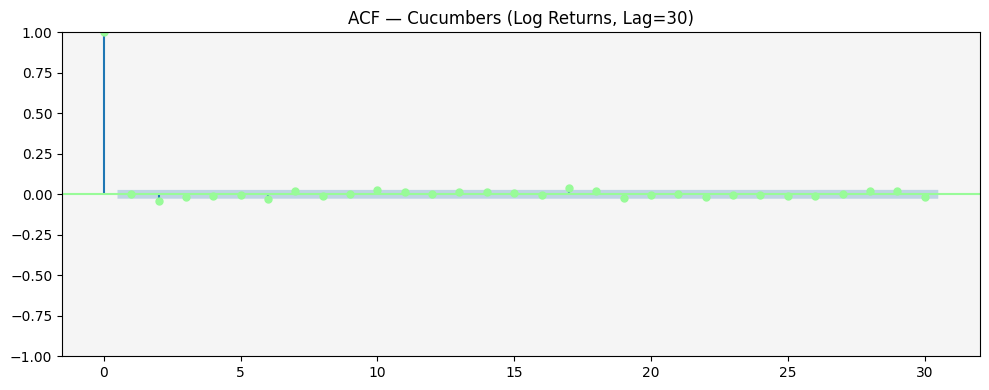

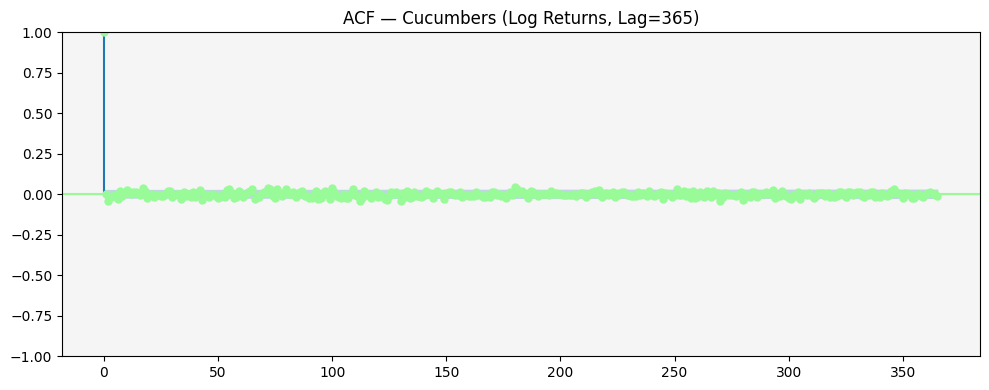

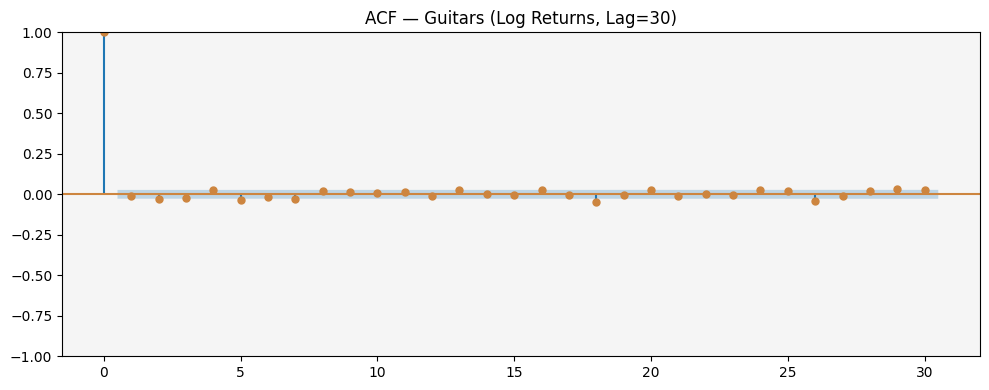

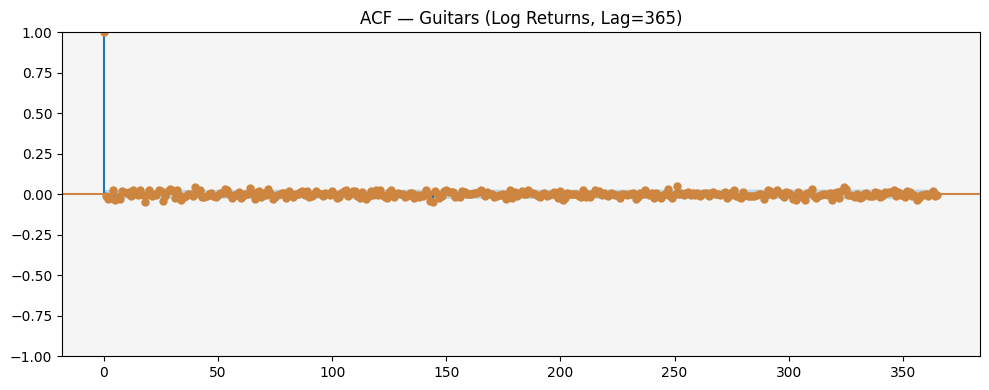

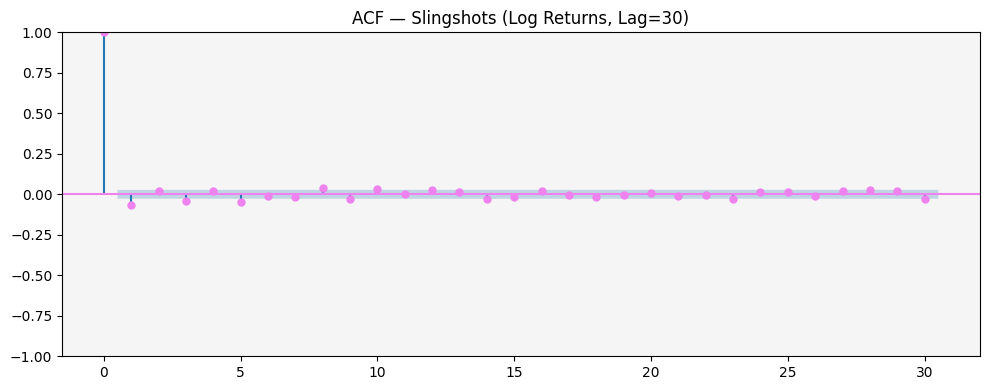

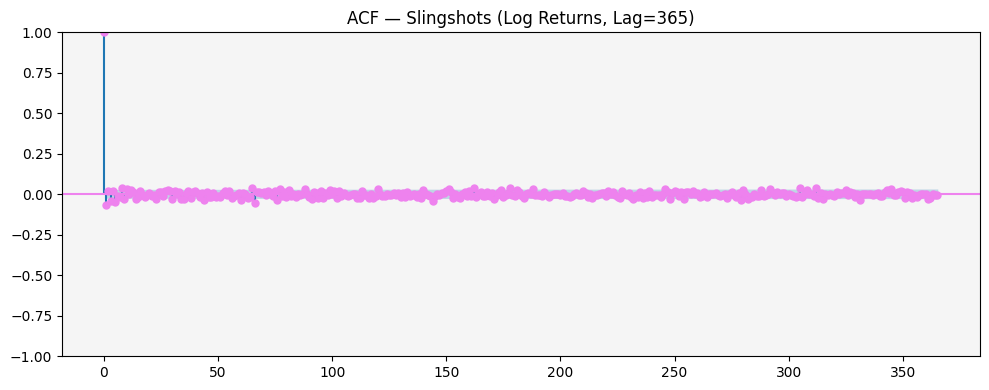

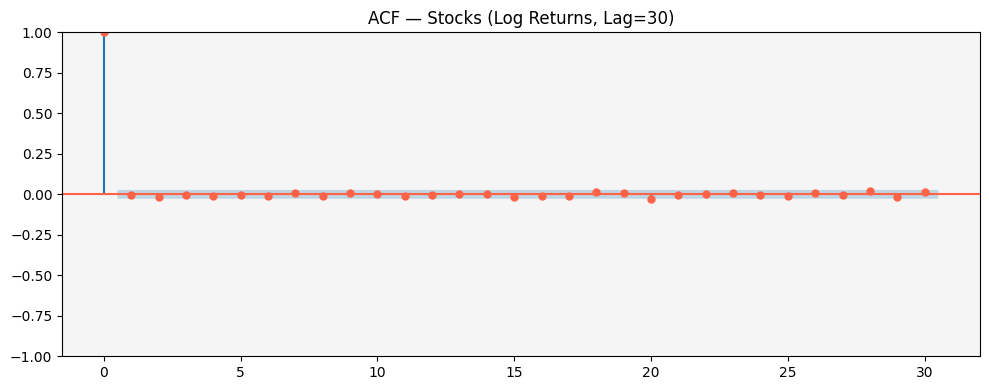

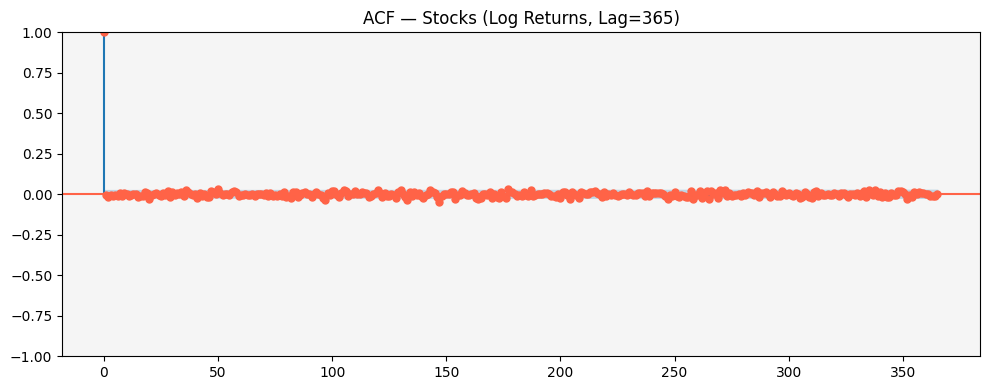

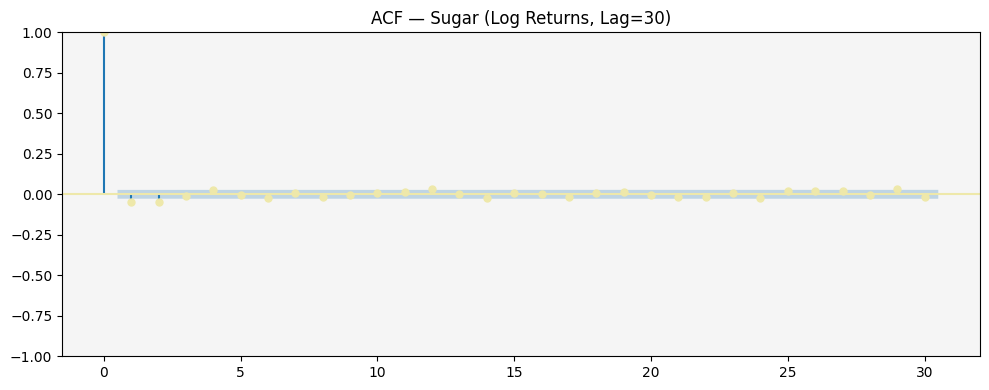

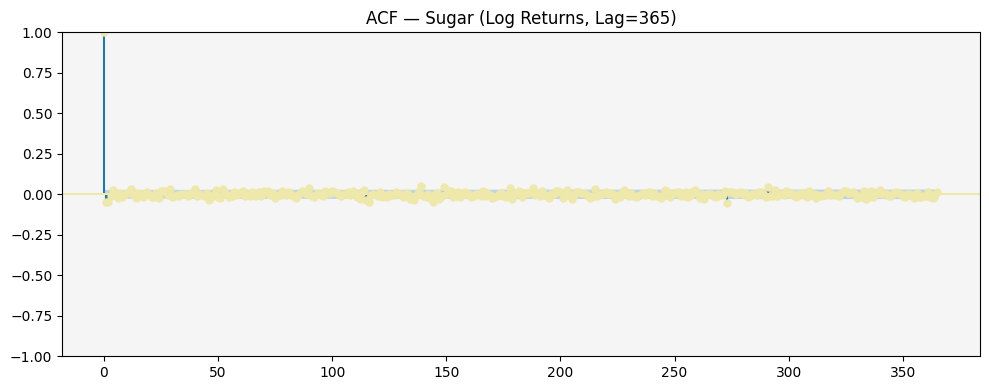

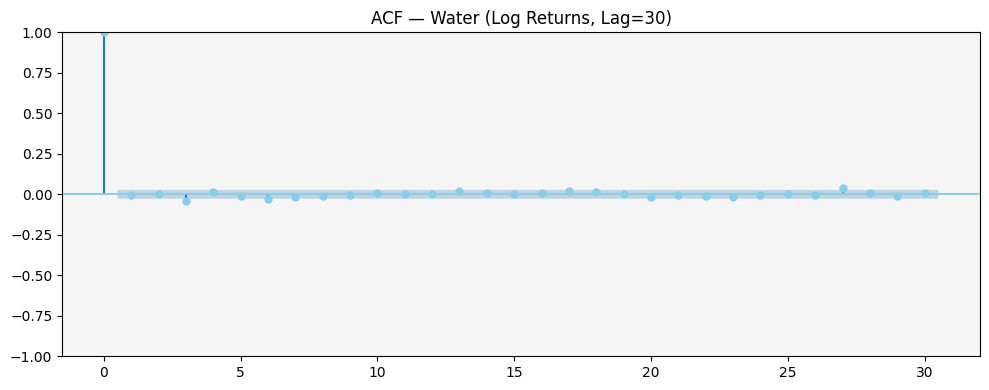

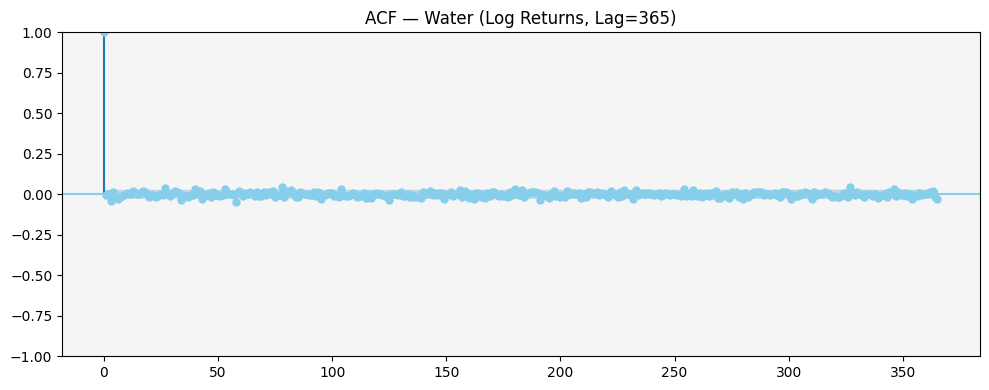

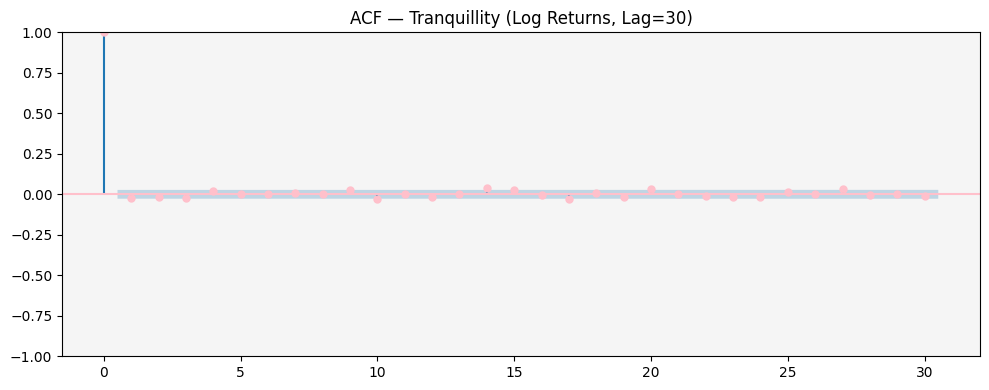

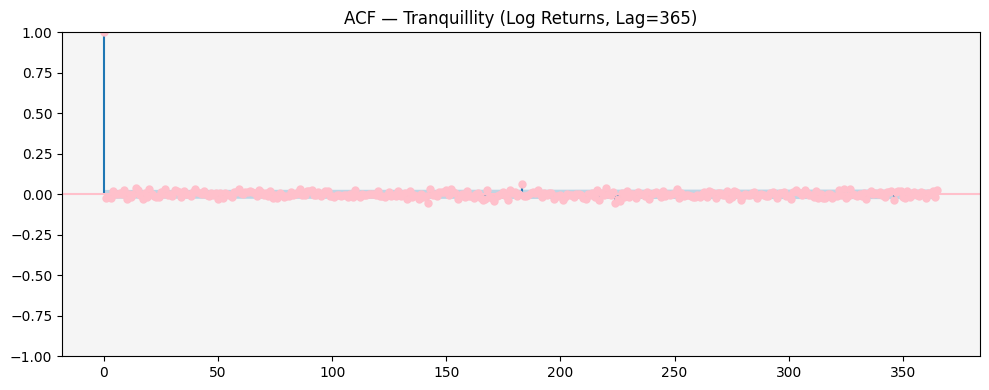

In [ ]:
# Lag windows to test
lags_to_plot = [30, 365]

# Generate ACF plots for each category
for column, color in colours.items():
    series = df[column].dropna()
    
    # Log returns
    log_return = np.log(series / series.shift(1)).dropna()

    for lag in lags_to_plot:
        if len(log_return) < lag:
            print(f"ℹ️ Skipping lag {lag} for {column}: not enough data.")
            continue
        
        fig, ax = plt.subplots(figsize=(10, 4))
        plot_acf(log_return, lags=lag, ax=ax, title=f"ACF — {column.capitalize()} (Log Returns, Lag={lag})", color=color)
        ax.set_facecolor("whitesmoke")
        plt.tight_layout()
        plt.show()



 ANALYSIS: CUCUMBERS


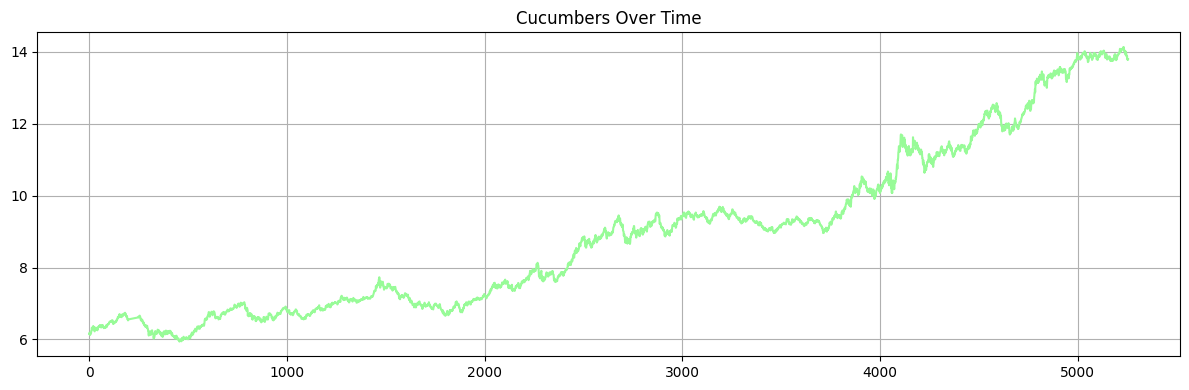

ADF p-value: 0.9905 → Non-Stationary
Seasonality Detected at Period(s):
 - 7 days (seasonal/residual var ratio ≈ 0.20)
 - 30 days (seasonal/residual var ratio ≈ 0.20)
 - 90 days (seasonal/residual var ratio ≈ 0.21)
 - 180 days (seasonal/residual var ratio ≈ 0.27)
 - 365 days (seasonal/residual var ratio ≈ 0.33)


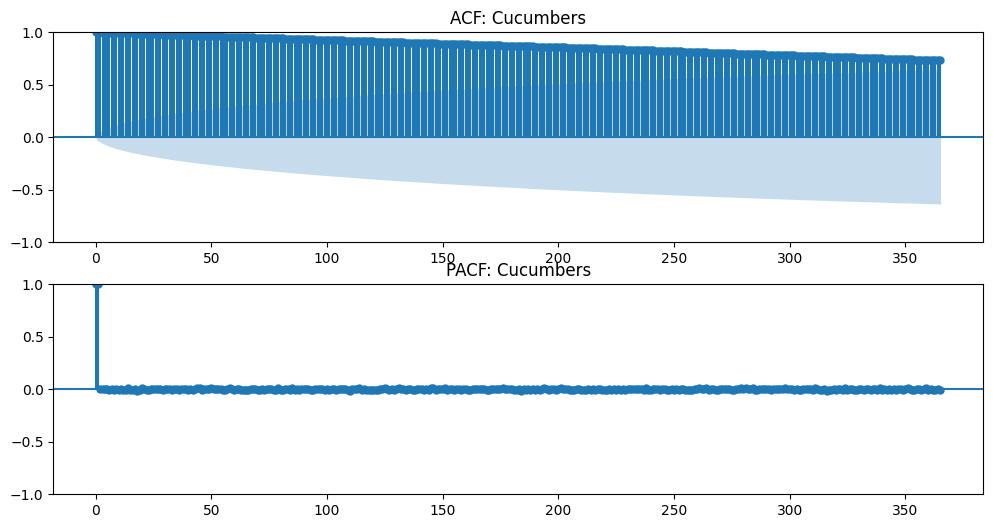

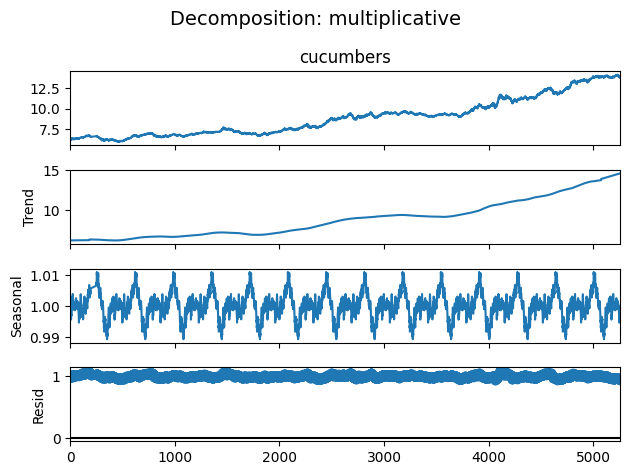

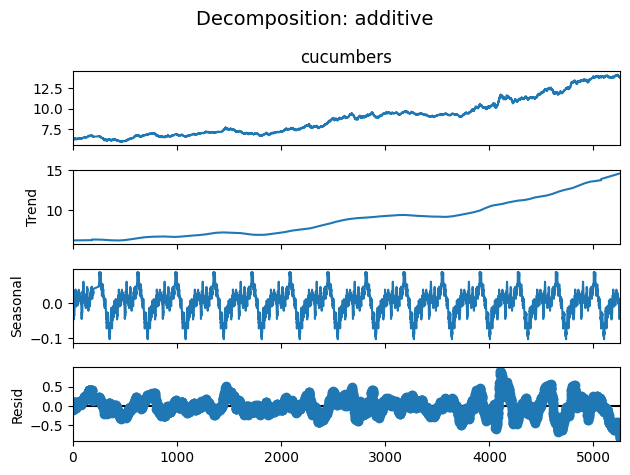

<Figure size 640x480 with 0 Axes>


 ANALYSIS: GUITARS


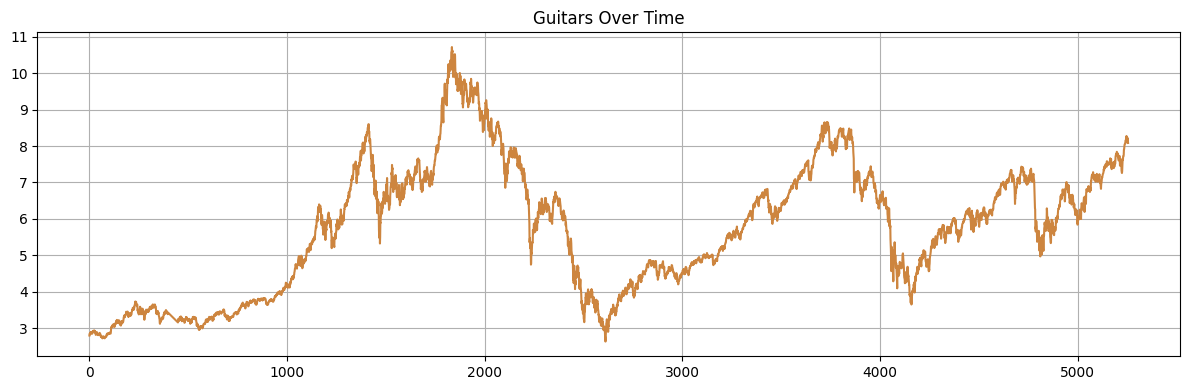

ADF p-value: 0.2646 → Non-Stationary
Seasonality Detected at Period(s):
 - 7 days (seasonal/residual var ratio ≈ 0.21)
 - 30 days (seasonal/residual var ratio ≈ 0.23)
 - 90 days (seasonal/residual var ratio ≈ 0.18)
 - 180 days (seasonal/residual var ratio ≈ 0.14)
 - 365 days (seasonal/residual var ratio ≈ 0.15)


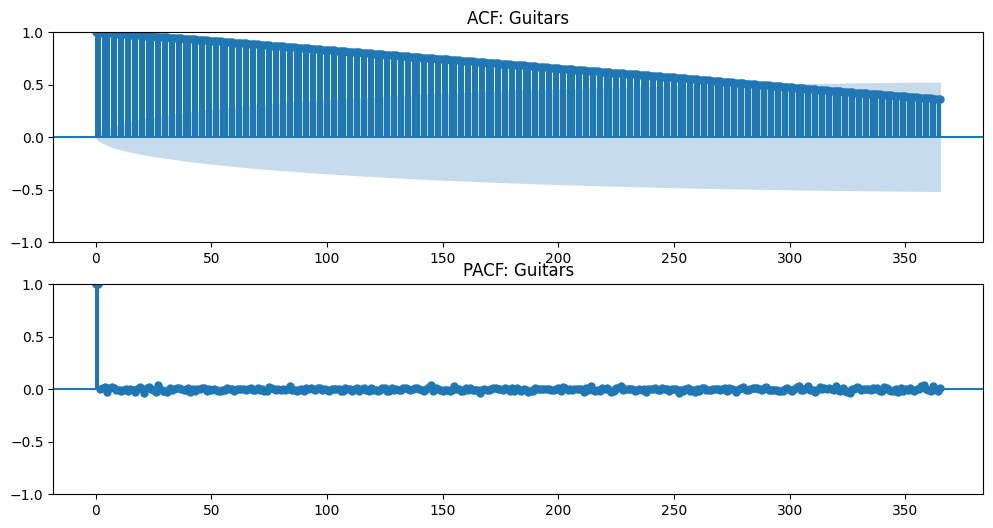

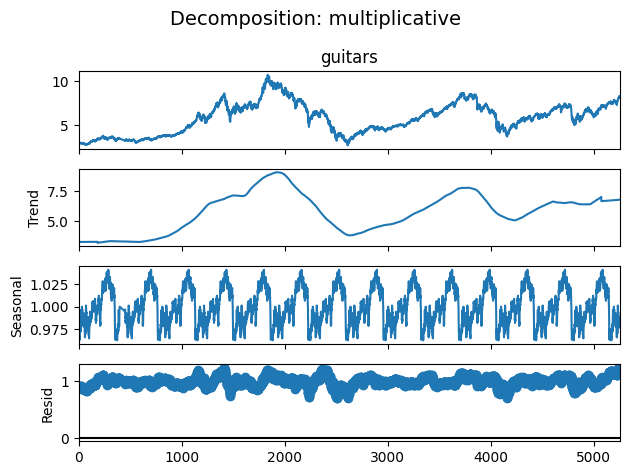

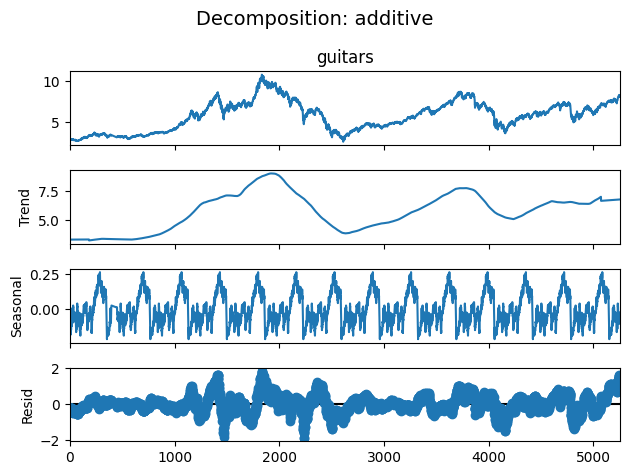

<Figure size 640x480 with 0 Axes>


 ANALYSIS: SLINGSHOTS


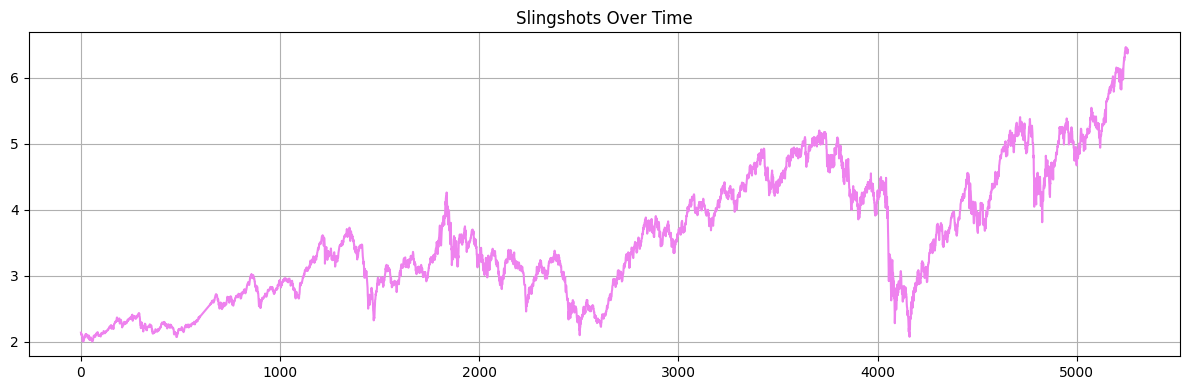

ADF p-value: 0.7803 → Non-Stationary
Seasonality Detected at Period(s):
 - 7 days (seasonal/residual var ratio ≈ 0.21)
 - 30 days (seasonal/residual var ratio ≈ 0.22)
 - 90 days (seasonal/residual var ratio ≈ 0.17)
 - 180 days (seasonal/residual var ratio ≈ 0.24)
 - 365 days (seasonal/residual var ratio ≈ 0.24)


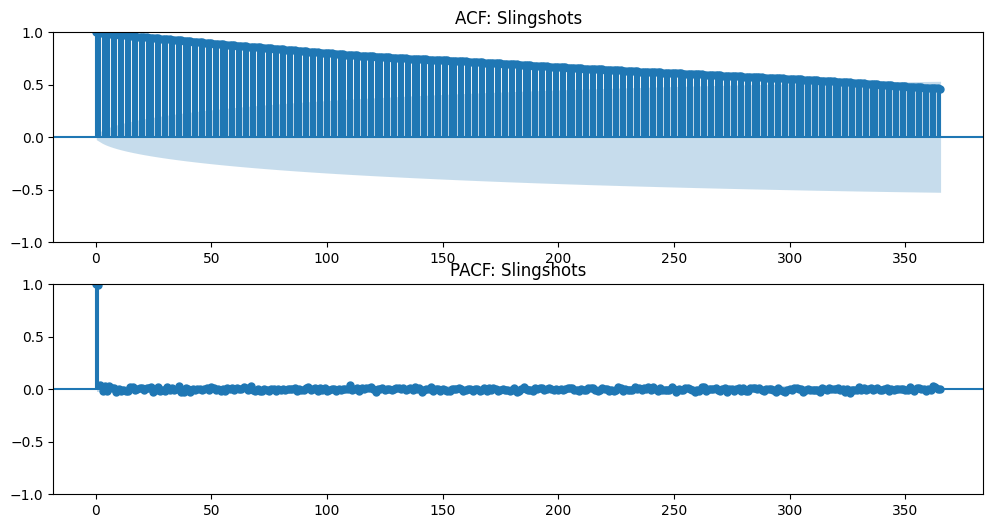

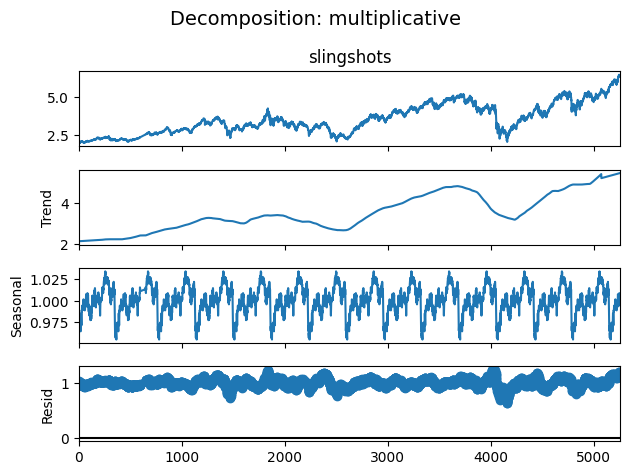

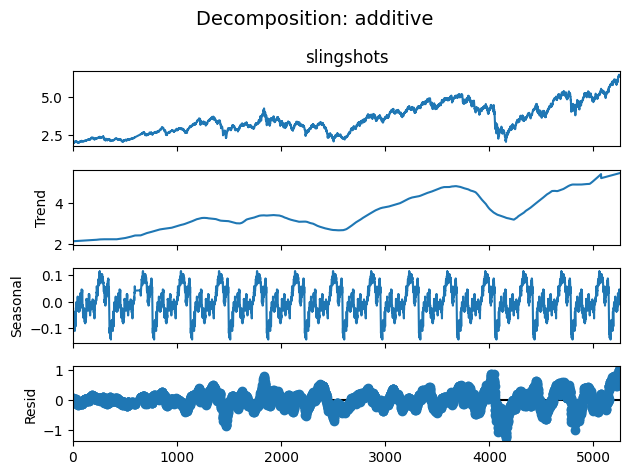

<Figure size 640x480 with 0 Axes>


 ANALYSIS: STOCKS


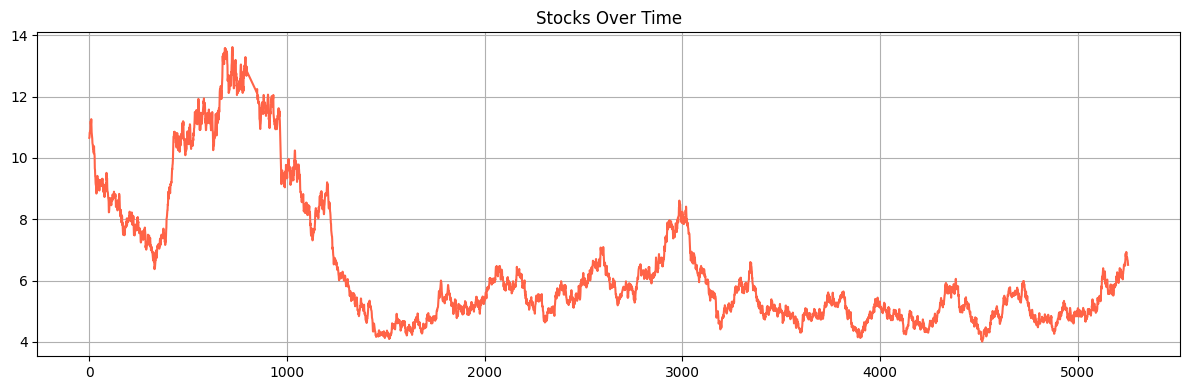

ADF p-value: 0.1718 → Non-Stationary
Seasonality Detected at Period(s):
 - 7 days (seasonal/residual var ratio ≈ 0.19)
 - 30 days (seasonal/residual var ratio ≈ 0.25)
 - 90 days (seasonal/residual var ratio ≈ 0.23)
 - 180 days (seasonal/residual var ratio ≈ 0.22)
 - 365 days (seasonal/residual var ratio ≈ 0.69)


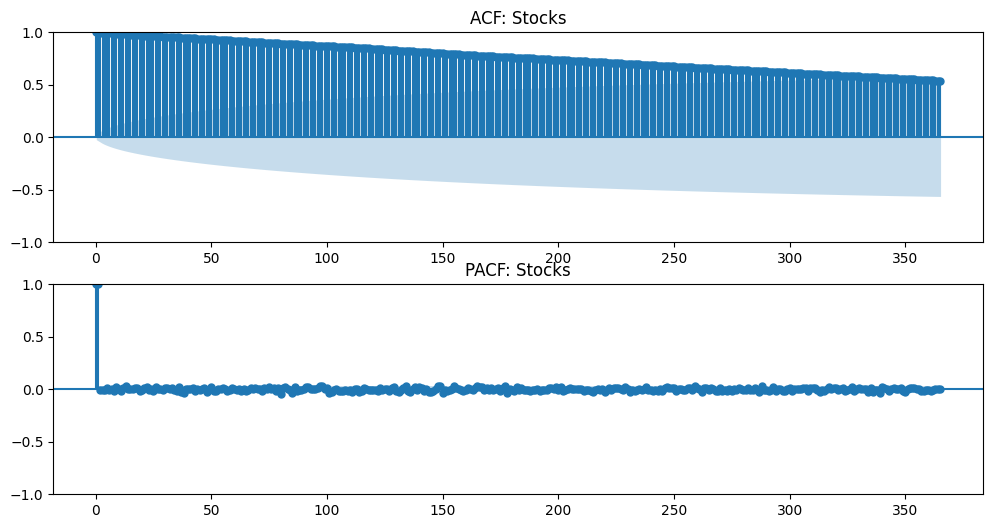

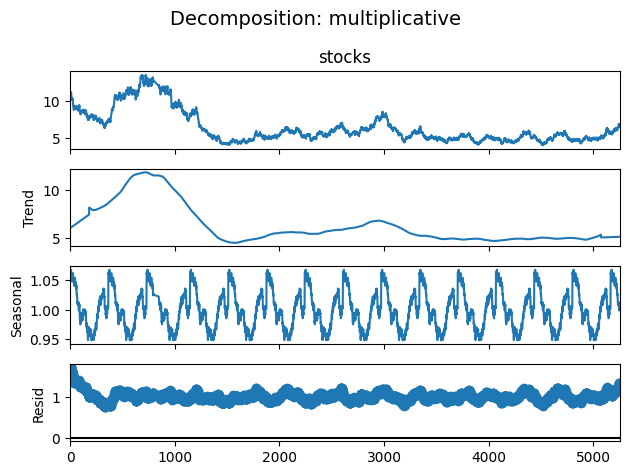

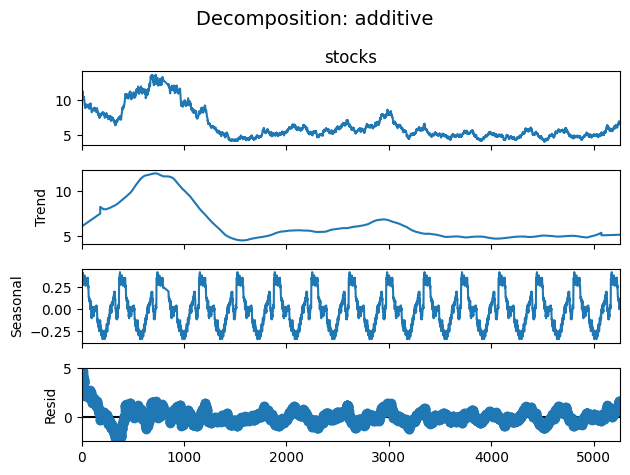

<Figure size 640x480 with 0 Axes>


 ANALYSIS: SUGAR


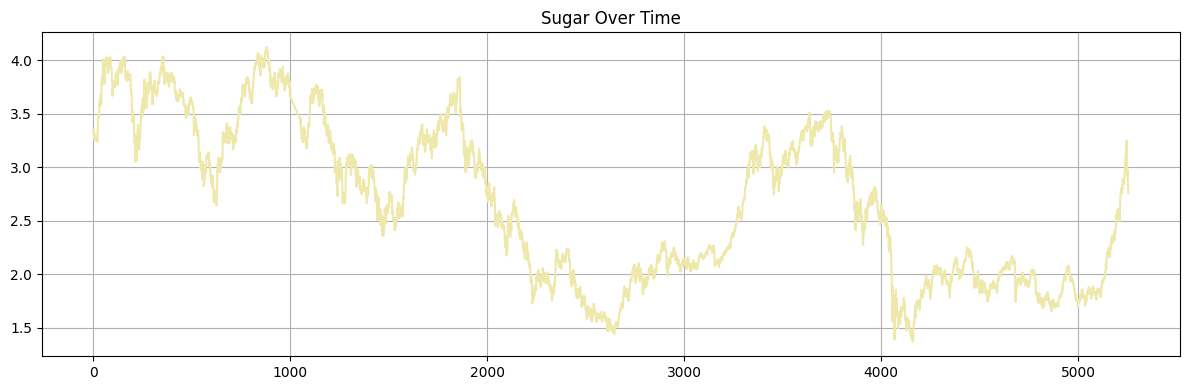

ADF p-value: 0.3219 → Non-Stationary
Seasonality Detected at Period(s):
 - 7 days (seasonal/residual var ratio ≈ 0.21)
 - 30 days (seasonal/residual var ratio ≈ 0.24)
 - 90 days (seasonal/residual var ratio ≈ 0.34)
 - 180 days (seasonal/residual var ratio ≈ 0.31)
 - 365 days (seasonal/residual var ratio ≈ 0.35)


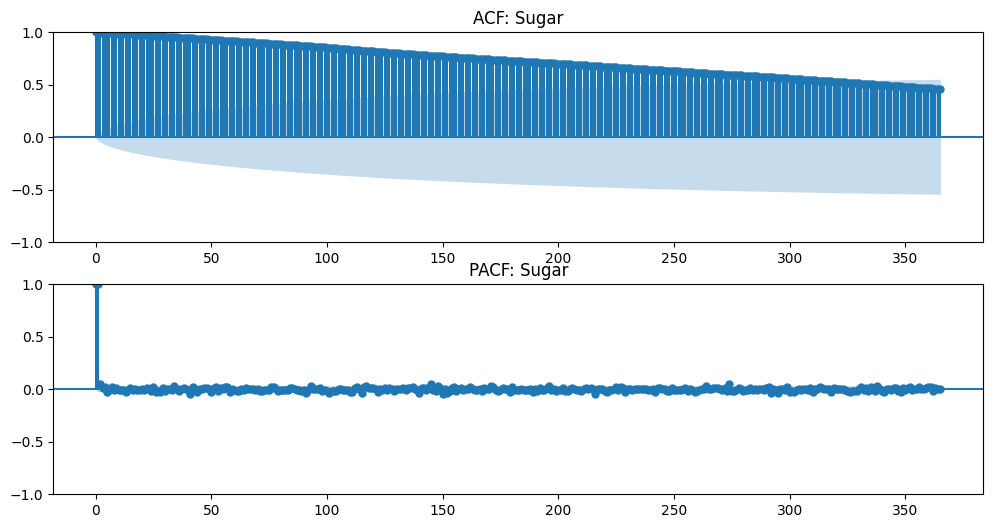

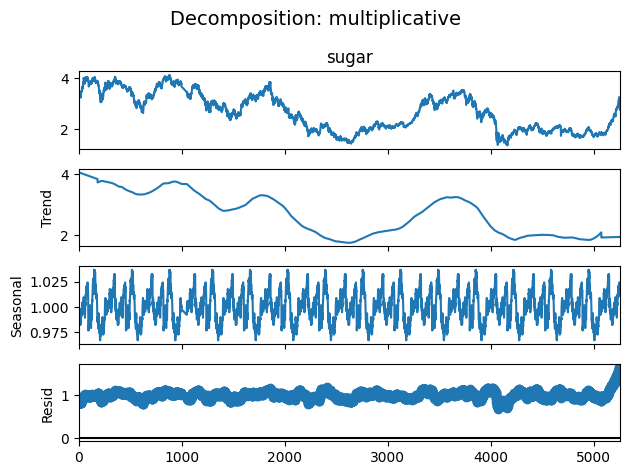

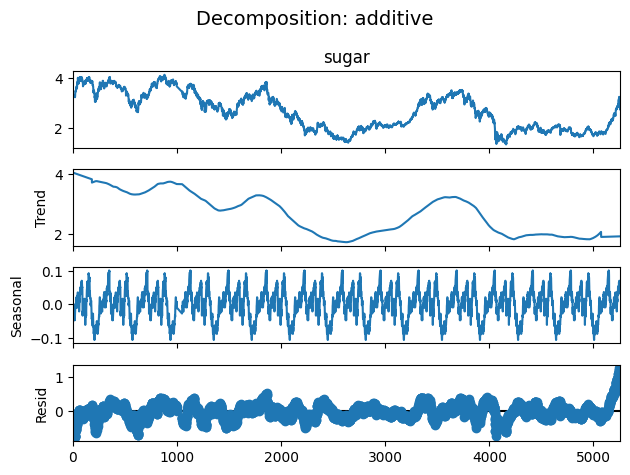

<Figure size 640x480 with 0 Axes>


 ANALYSIS: WATER


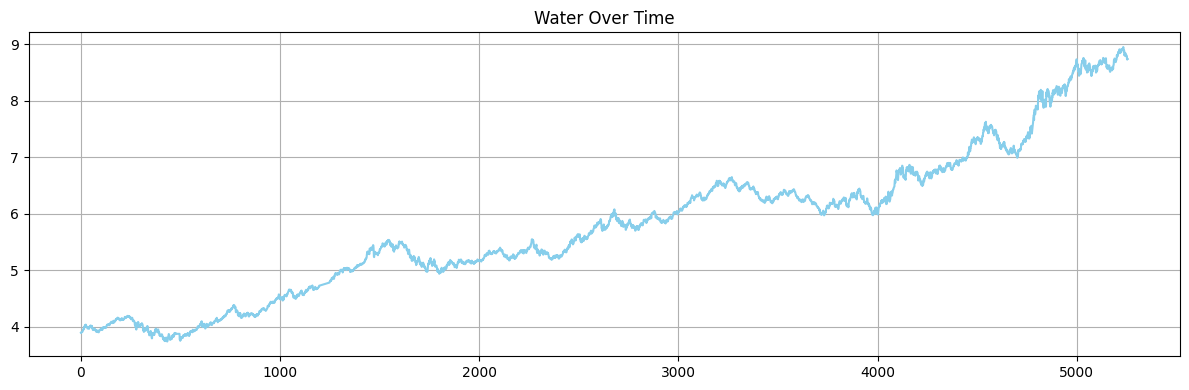

ADF p-value: 0.9914 → Non-Stationary
Seasonality Detected at Period(s):
 - 7 days (seasonal/residual var ratio ≈ 0.18)
 - 30 days (seasonal/residual var ratio ≈ 0.24)
 - 90 days (seasonal/residual var ratio ≈ 0.28)
 - 180 days (seasonal/residual var ratio ≈ 0.23)
 - 365 days (seasonal/residual var ratio ≈ 0.18)


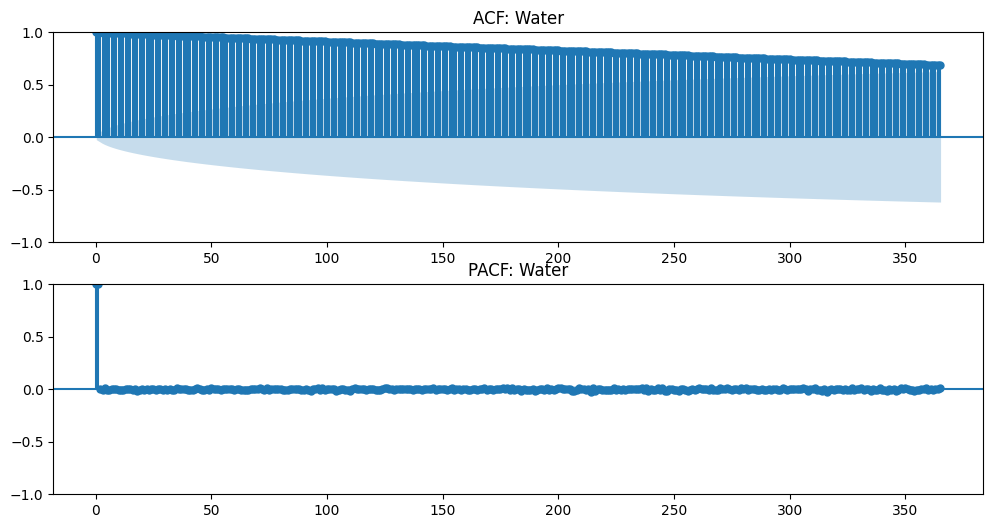

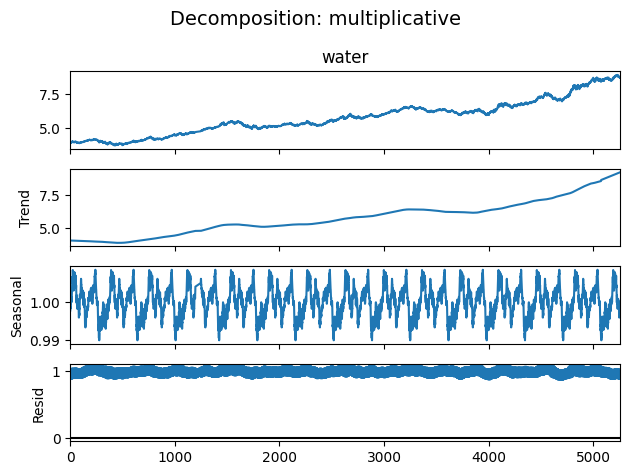

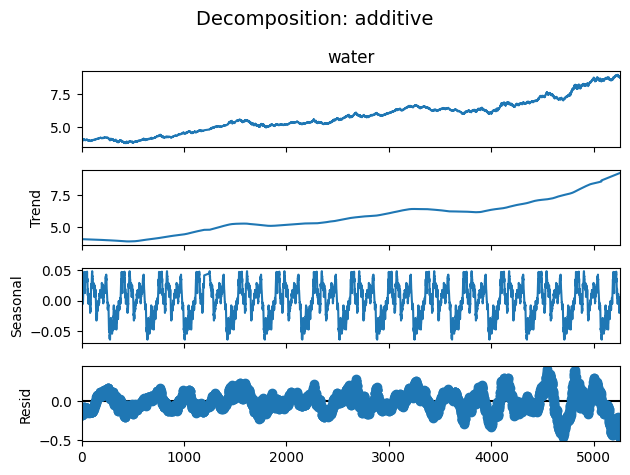

<Figure size 640x480 with 0 Axes>


 ANALYSIS: TRANQUILLITY


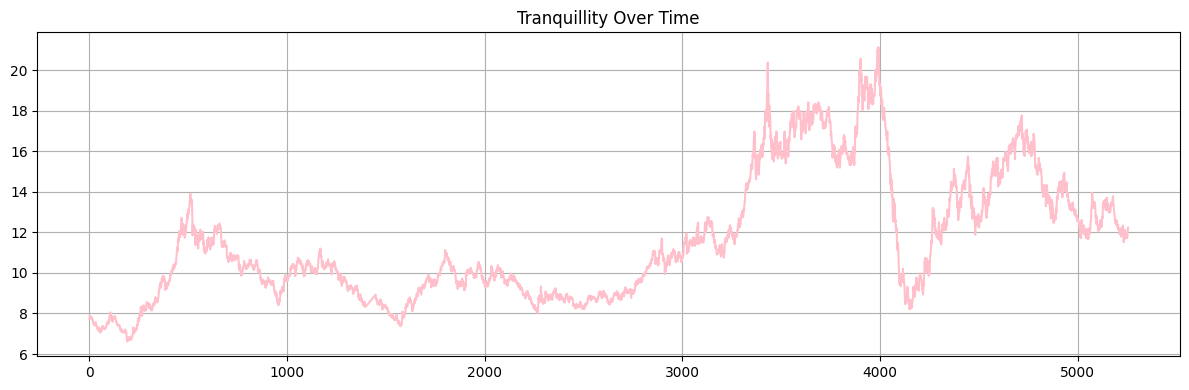

ADF p-value: 0.1916 → Non-Stationary
Seasonality Detected at Period(s):
 - 7 days (seasonal/residual var ratio ≈ 0.17)
 - 30 days (seasonal/residual var ratio ≈ 0.21)
 - 90 days (seasonal/residual var ratio ≈ 0.26)
 - 180 days (seasonal/residual var ratio ≈ 0.15)
 - 365 days (seasonal/residual var ratio ≈ 0.14)


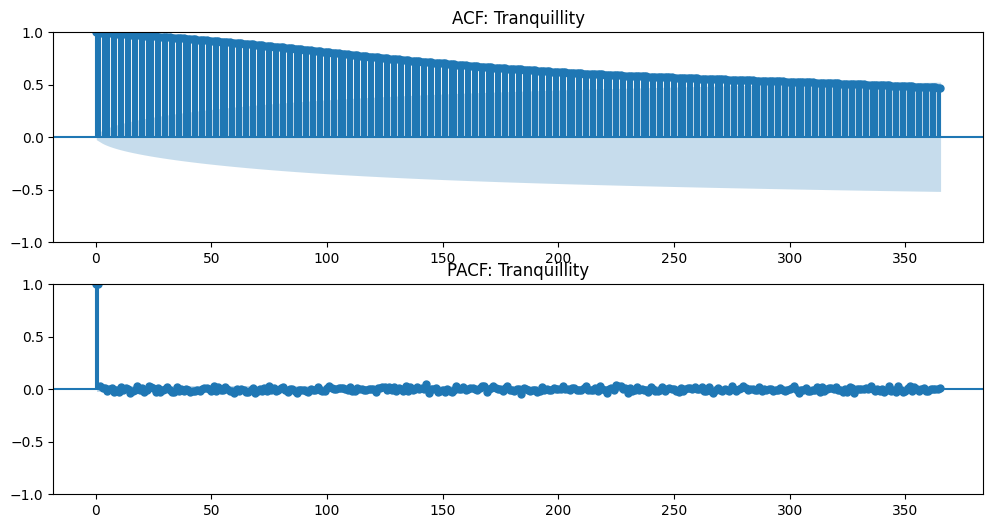

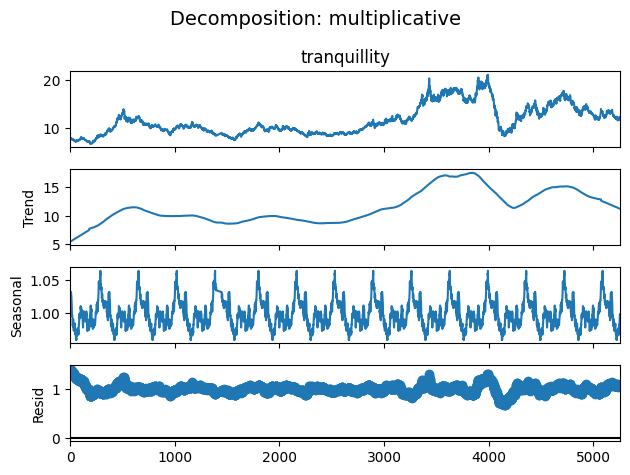

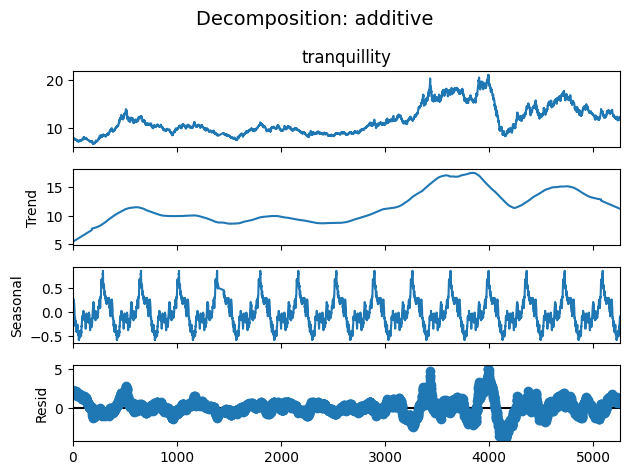

<Figure size 640x480 with 0 Axes>

In [35]:
# Candidate seasonal periods (in days)
candidate_periods = [7, 30, 90, 180, 365]

# Loop through all series
for col, color in colours.items():
    series = df[col].dropna()

    print(f"\n{'='*50}\n ANALYSIS: {col.upper()}\n{'='*50}")

    #Plot
    plt.figure(figsize=(12, 4))
    plt.plot(series, color=color)
    plt.title(f"{col.capitalize()} Over Time")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    #ADF test for stationarity
    adf_result = adfuller(series)
    print(f"ADF p-value: {adf_result[1]:.4f} → {'Stationary' if adf_result[1] < 0.05 else 'Non-Stationary'}")

    # Smart Seasonality Detection
    detected_periods = []

    for period in candidate_periods:
        stl = STL(series, period=period, robust=True)
        result = stl.fit()
        seasonal_var = np.var(result.seasonal)
        resid_var = np.var(result.resid)

        ratio = seasonal_var / (resid_var + 1e-5)
        if ratio > 0.1:  # threshold ?
            detected_periods.append((period, ratio))

    if detected_periods:
        print("Seasonality Detected at Period(s):")
        for p, r in detected_periods:
            print(f" - {p} days (seasonal/residual var ratio ≈ {r:.2f})")
    else:
        print("No strong seasonality detected.")

    # ACF & PACF
    fig, axs = plt.subplots(2, 1, figsize=(12, 6))
    plot_acf(series, lags=365, ax=axs[0])
    axs[0].set_title(f'ACF: {col.capitalize()}')

    plot_pacf(series, lags=365, ax=axs[1])
    axs[1].set_title(f'PACF: {col.capitalize()}')
    
    # Decomposition multiplicative
    decomp = seasonal_decompose(series, model='multiplicative', period=365, extrapolate_trend='freq')
    decomp.plot()
    plt.suptitle(f'Decomposition: multiplicative', fontsize=14)
    plt.tight_layout()
    plt.show()
    
    # Decomposition additive
    decomp = seasonal_decompose(series, model='additive', period=365, extrapolate_trend='freq')
    decomp.plot()
    plt.suptitle(f'Decomposition: additive', fontsize=14)
    plt.tight_layout()
    plt.show()
    
    
    # Check if seasonal component has significant variation
    seasonal_std = decomp.seasonal.std()
    is_seasonal_from_decomp = seasonal_std > 0.1  # threshold can be adjusted

    plt.tight_layout()
    plt.show()


In [36]:
trends = {}
seasonals = {}
residuals = {}

for column, color in colours.items():
    series = df[column].dropna()
    # Decompose with extrapolated trend
    result = seasonal_decompose(series, model='multiplicative', period=365, extrapolate_trend='freq')

    trends[column] = result.trend
    seasonals[column] = result.seasonal
    residuals[column] = result.resid

# Convert to DataFrames
trend_df = pd.DataFrame(trends)
seasonal_df = pd.DataFrame(seasonals)
resid_df = pd.DataFrame(residuals)

In [37]:
trend_df.head()

cucumbers   guitars  slingshots    stocks     sugar     water  tranquillity
0   6.254409  3.285182    2.156166  6.064055  4.046958  4.087077      5.387819
1   6.254574  3.285241    2.156458  6.071897  4.045737  4.086727      5.399256
2   6.254739  3.285301    2.156750  6.079739  4.044515  4.086378      5.410693
3   6.254904  3.285361    2.157042  6.087581  4.043294  4.086028      5.422129
4   6.255069  3.285420    2.157334  6.095423  4.042072  4.085678      5.433566

In [38]:
seasonal_df.head()

cucumbers   guitars  slingshots    stocks     sugar     water  tranquillity
0   0.998327  0.966780    0.966747  1.059370  0.987324  0.997634      1.028054
1   0.998789  0.967969    0.966699  1.062803  0.989547  0.997685      1.029812
2   0.999750  0.966413    0.970465  1.061993  0.997076  0.998989      1.029974
3   0.999941  0.968365    0.970328  1.061291  0.992048  0.998295      1.030426
4   0.998819  0.965252    0.973158  1.060415  0.990447  0.999135      1.030629

In [39]:
resid_df.head()

cucumbers   guitars  slingshots    stocks     sugar     water  tranquillity
0   0.985699  0.879800    1.024980  1.658399  0.832127  0.955546      1.400239
1   0.990815  0.894043    1.013881  1.654127  0.838211  0.956502      1.399461
2   0.986481  0.894388    1.011126  1.676162  0.827354  0.954721      1.415106
3   0.984310  0.887458    1.001481  1.679200  0.819785  0.956389      1.404675
4   0.980352  0.893273    1.000182  1.680271  0.825210  0.956692      1.407686

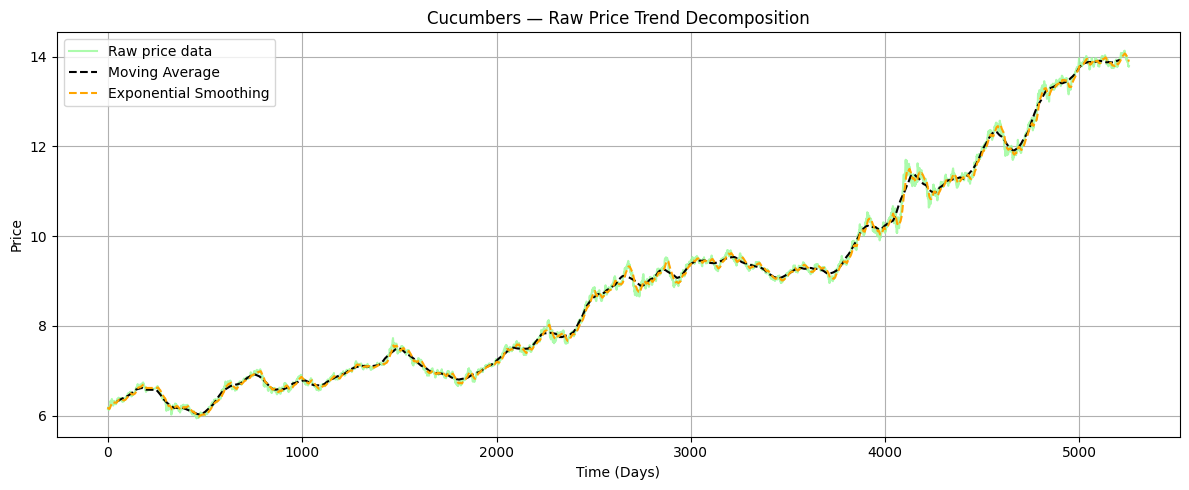

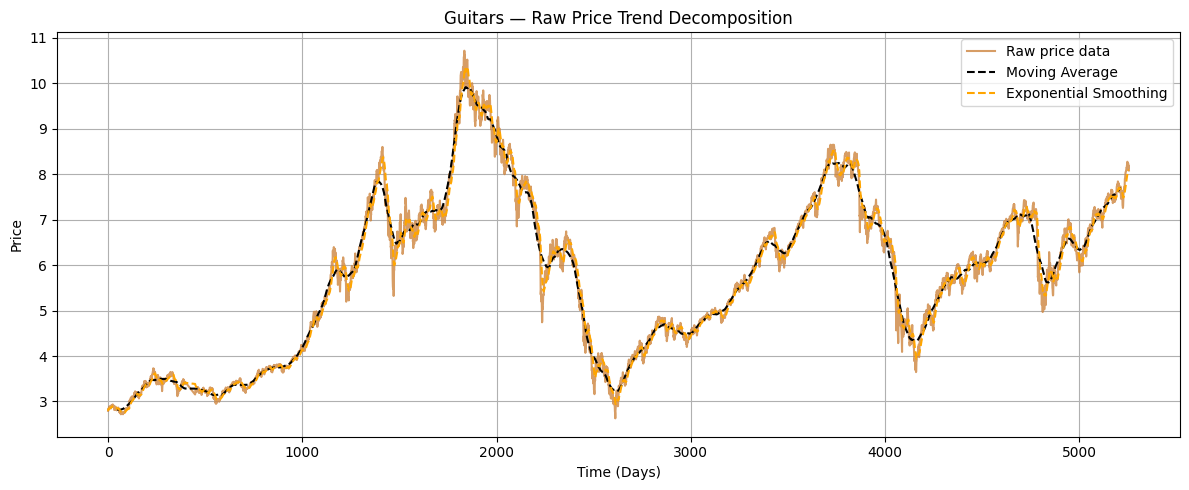

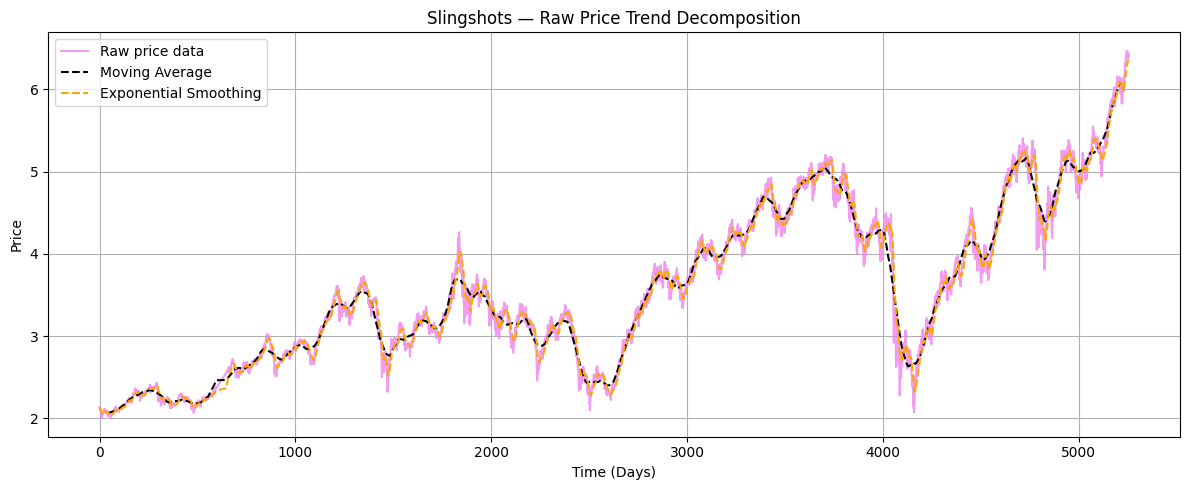

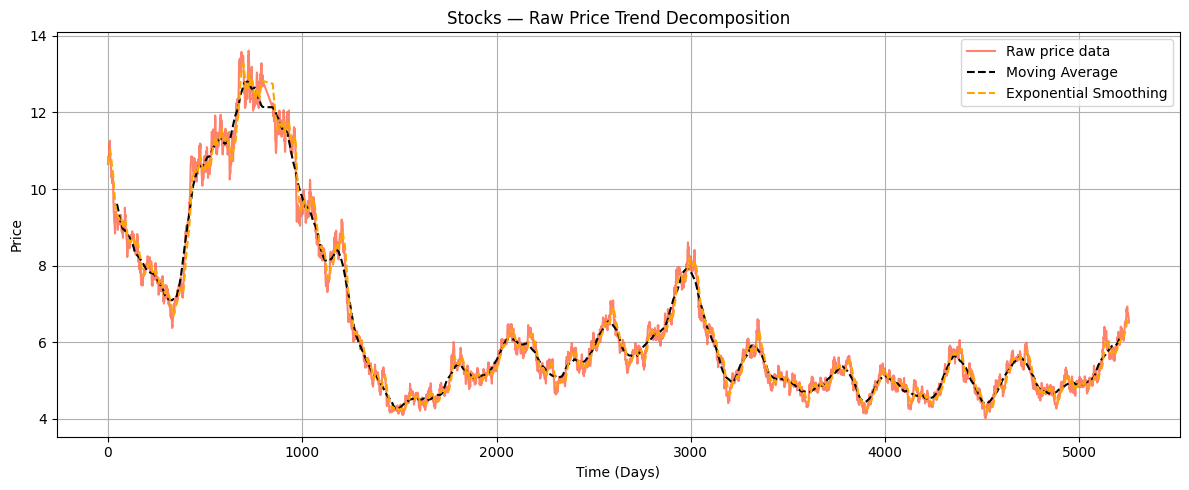

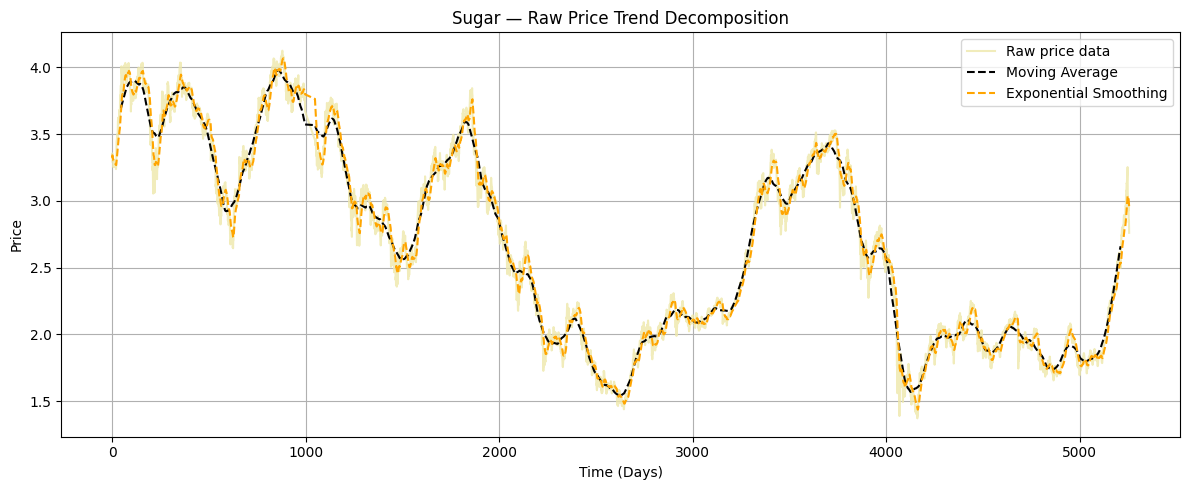

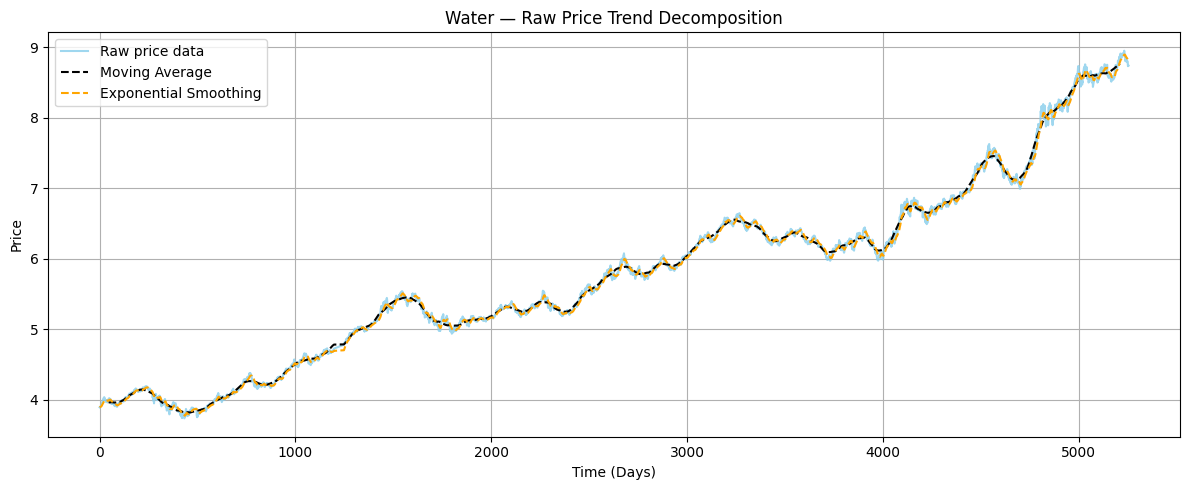

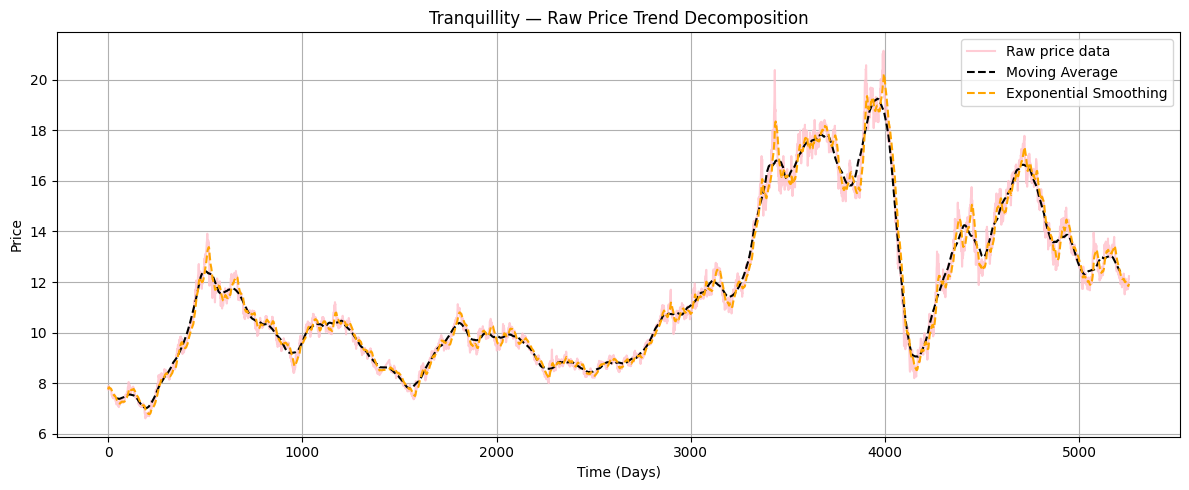

In [31]:
# Parameters
ma_window = 90
ewma_alpha = 0.1
ols_trend_length = 5256

def linear_least_squares_trend(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    beta_1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
    beta_0 = y_mean - beta_1 * x_mean
    return beta_0 + beta_1 * x

# Loop through each series
for column, color in colours.items():
    series = df[column].dropna()

    # Moving average and exponential smoothing
    ma_trend = series.rolling(window=ma_window, center=True).mean()
    ewma_trend = series.ewm(alpha=ewma_alpha).mean()
    
    # OLS trend on last N points
    if len(series) >= ols_trend_length:
        x = np.arange(ols_trend_length)
        y = series[-ols_trend_length:].values
        trend_values = linear_least_squares_trend(x, y)
        ols_index = series.index[-ols_trend_length:]
    else:
        trend_values = None

    # Plot
    plt.figure(figsize=(12, 5))
    plt.plot(series.index, series, color=color, alpha=0.8, label='Raw price data')
    plt.plot(series.index, ma_trend, '--', color='black', label='Moving Average')
    plt.plot(series.index, ewma_trend, '--', color='orange', label='Exponential Smoothing')
    
    if trend_values is not None:
        plt.plot(ols_index, trend_values, '--', color='dodgerblue', label='Linear Trend (Least Squares)')

    plt.title(f"{column.capitalize()} — Raw Price Trend Decomposition")
    plt.xlabel("Time (Days)")
    plt.ylabel("Price")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


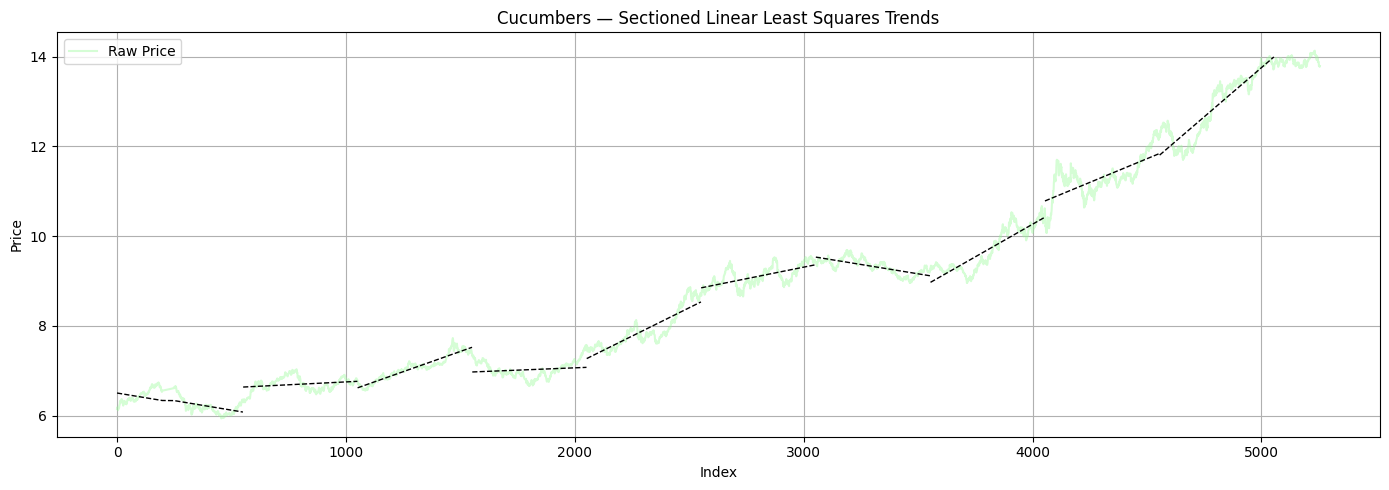

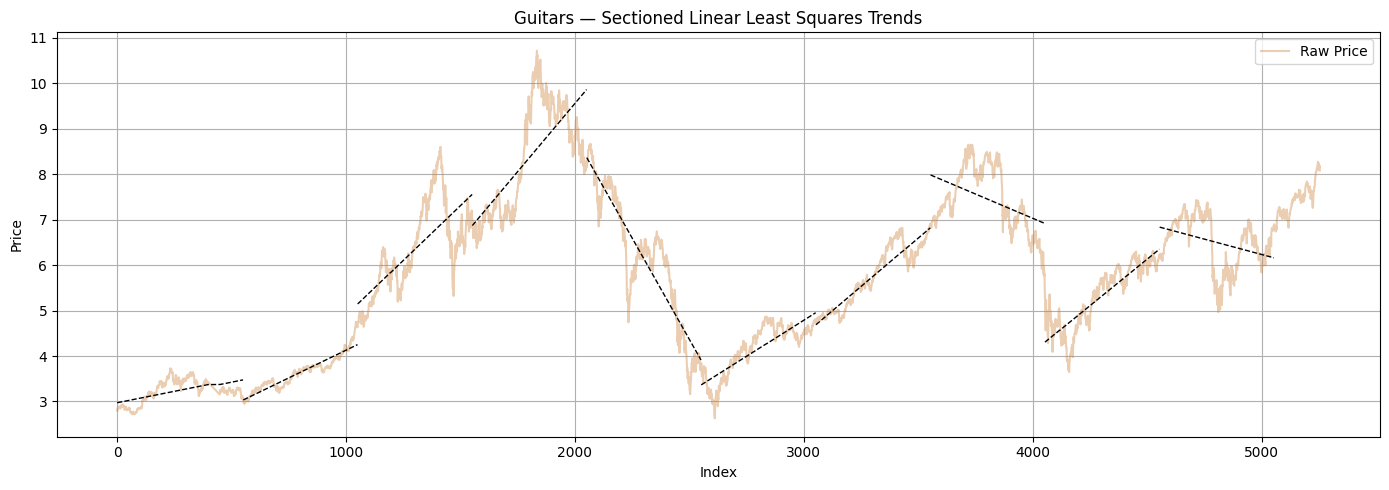

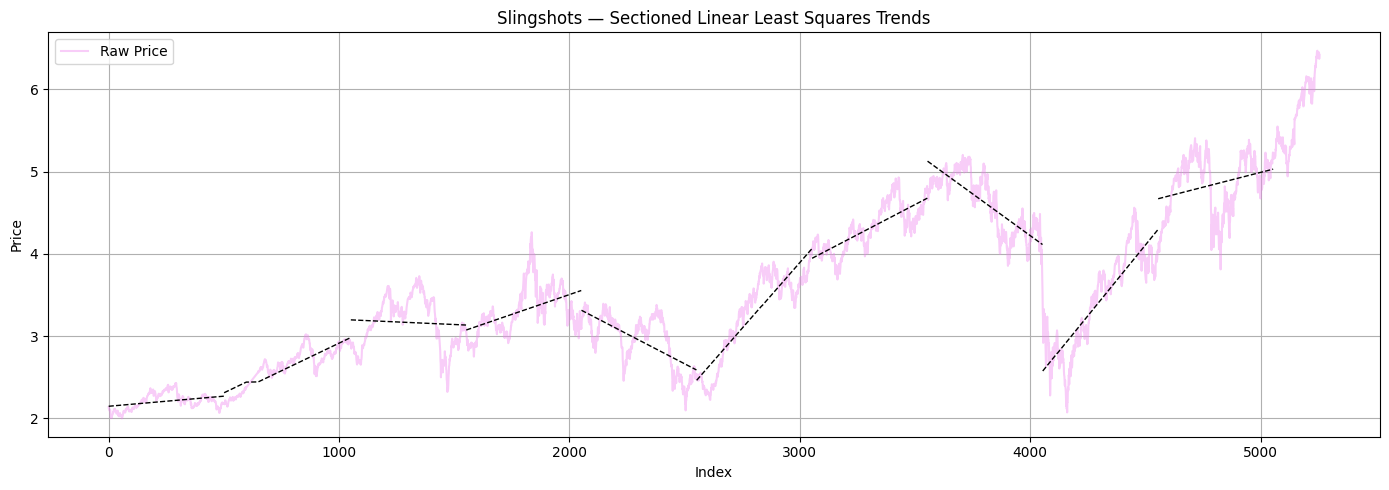

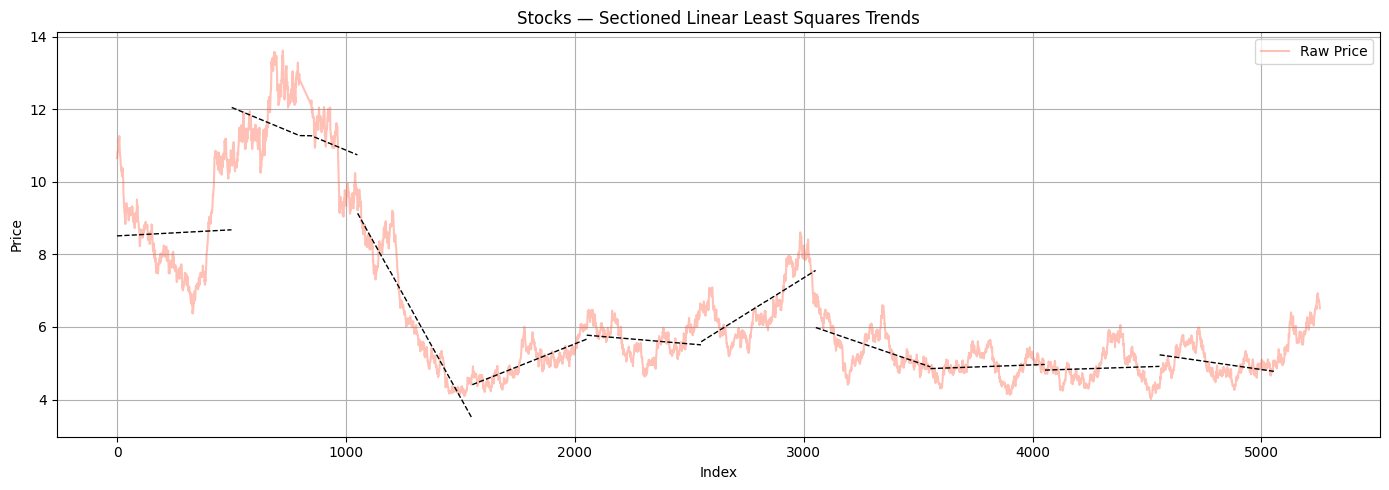

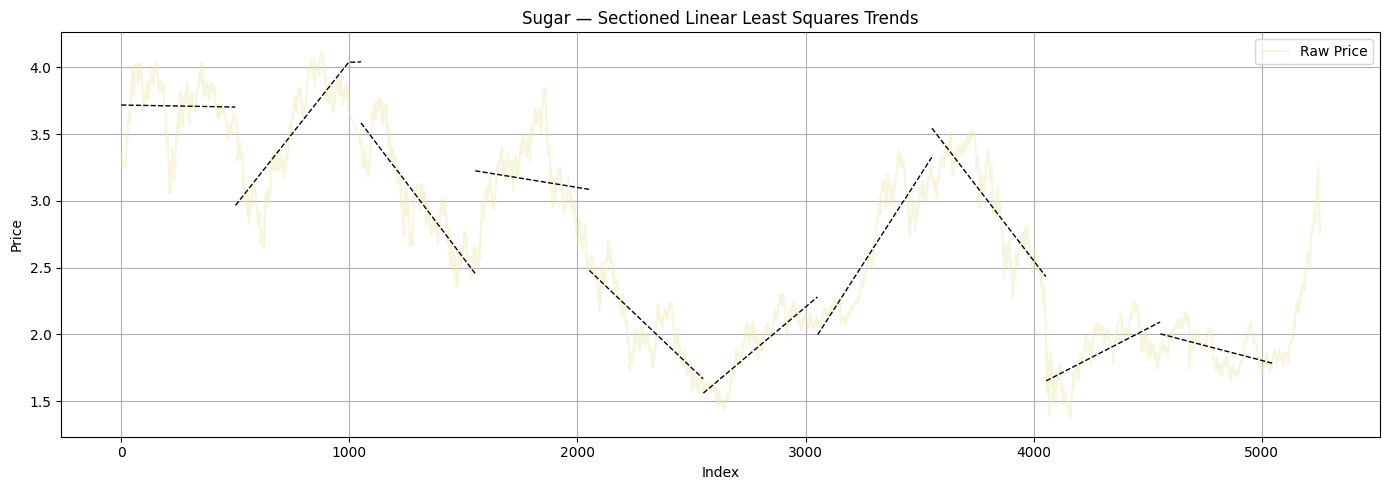

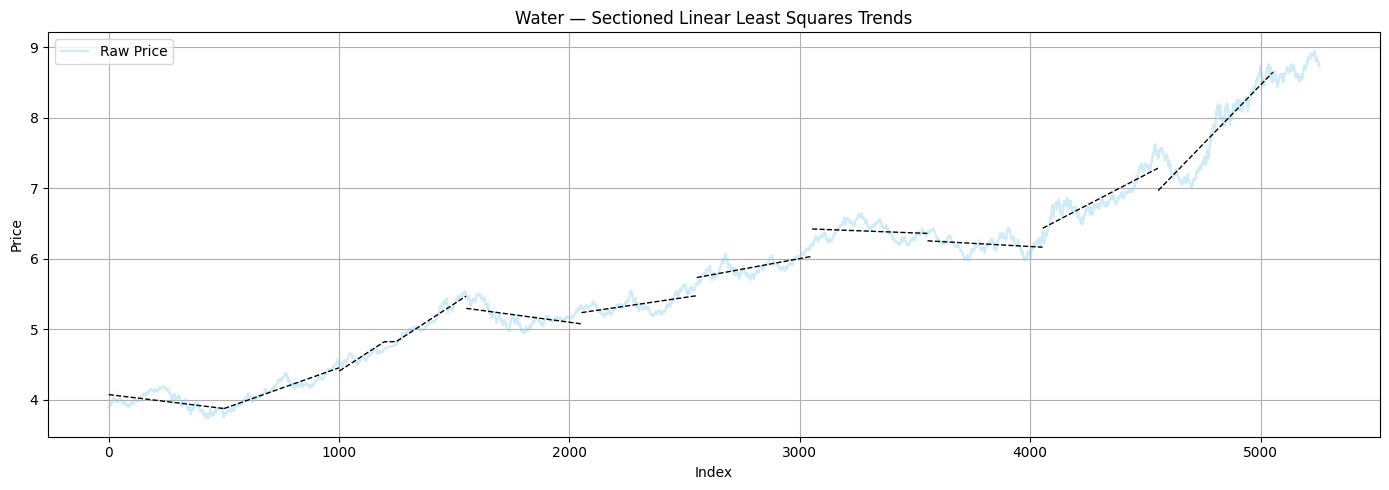

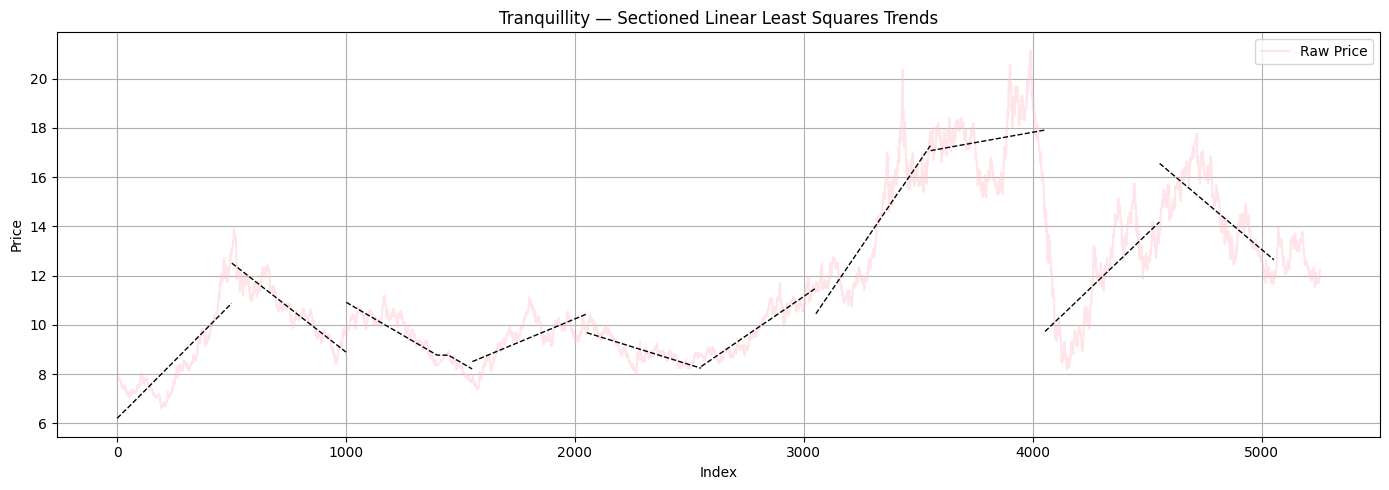

In [32]:
# Segment length
segment_size = 500

# Linear Least Squares
def linear_least_squares(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    beta_1 = np.sum((x - x_mean)*(y - y_mean)) / np.sum((x - x_mean)**2)
    beta_0 = y_mean - beta_1 * x_mean
    return beta_0 + beta_1 * x

# Process each category
for column, color in colours.items():
    series = df[column].dropna()
    if len(series) < segment_size:
        print(f"Skipping {column}: Not enough data for segmentation.")
        continue

    plt.figure(figsize=(14, 5))
    plt.plot(series.index, series.values, label="Raw Price", color=color, alpha=0.4)

    # Break into segments
    num_segments = len(series) // segment_size
    for i in range(num_segments):
        start = i * segment_size
        end = start + segment_size
        segment = series.iloc[start:end]
        if len(segment) < segment_size:
            continue
        x = np.arange(len(segment))
        trend = linear_least_squares(x, segment.values)
        plt.plot(segment.index, trend, color='black', linestyle='--', linewidth=1)

    plt.title(f"{column.capitalize()} — Sectioned Linear Least Squares Trends")
    plt.xlabel("Index")
    plt.ylabel("Price")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


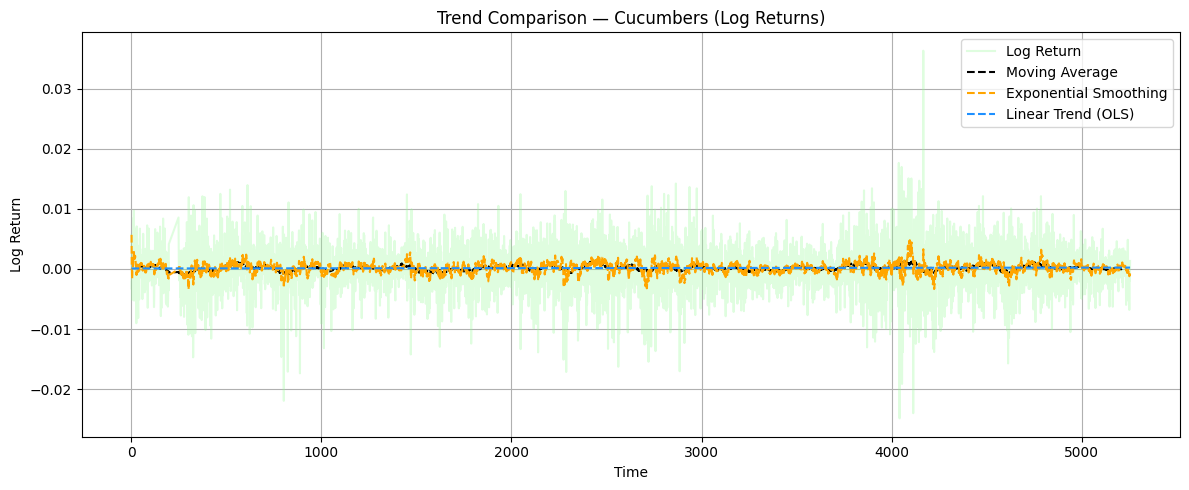

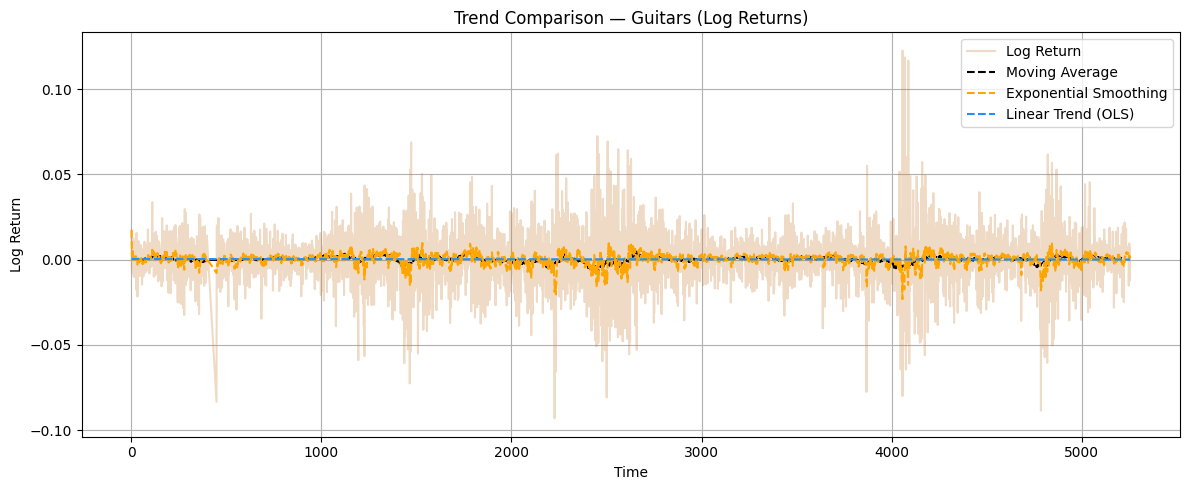

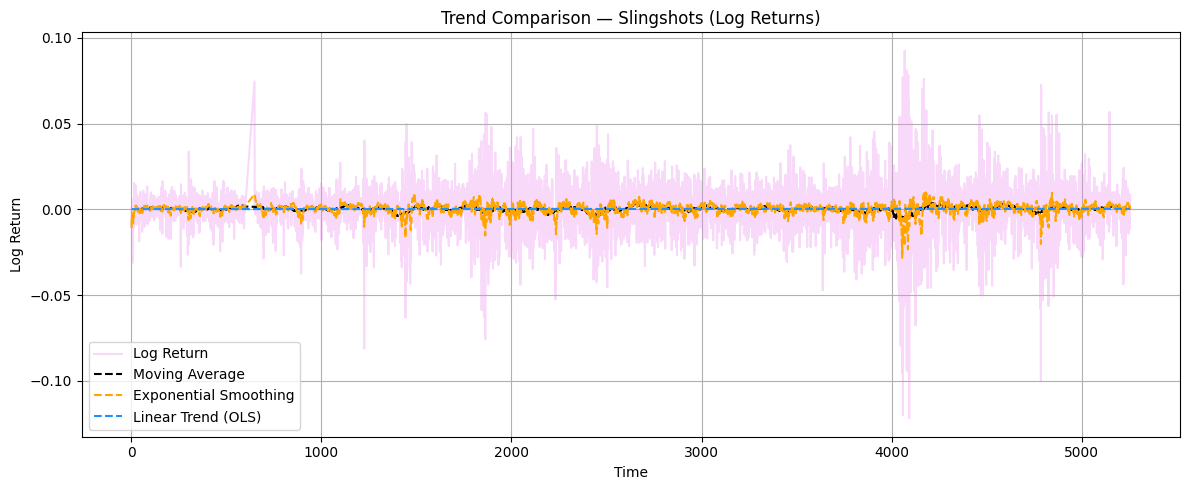

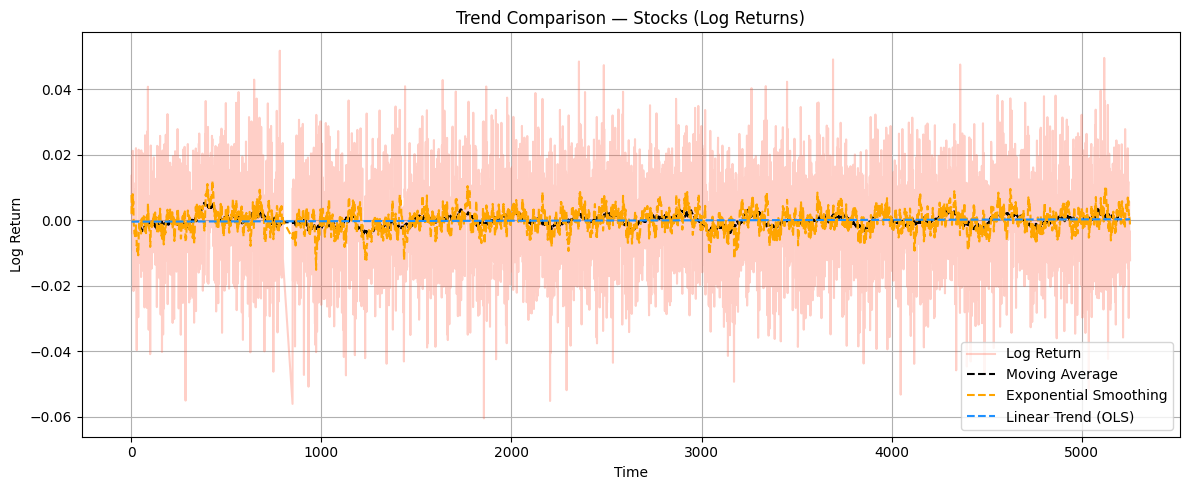

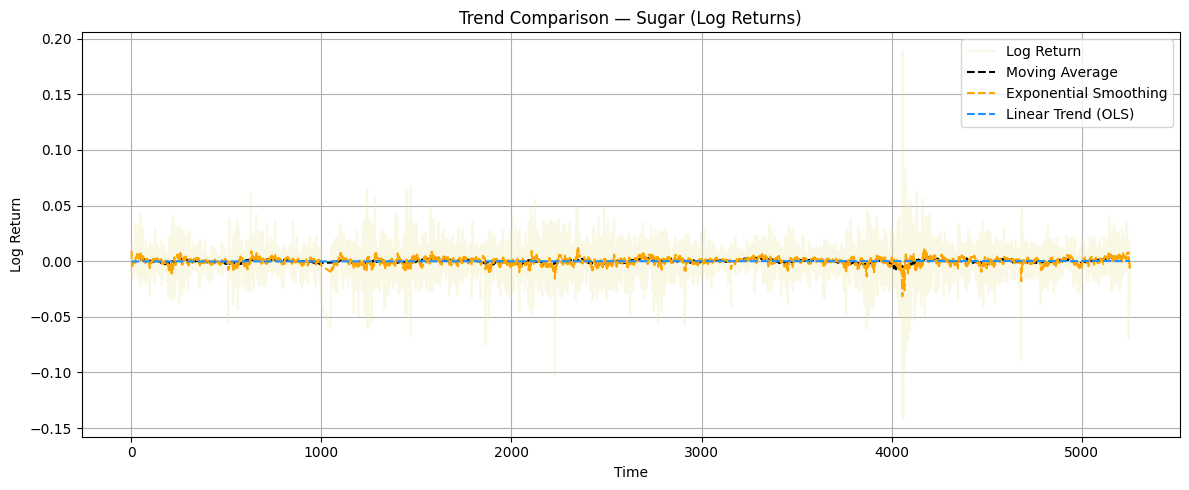

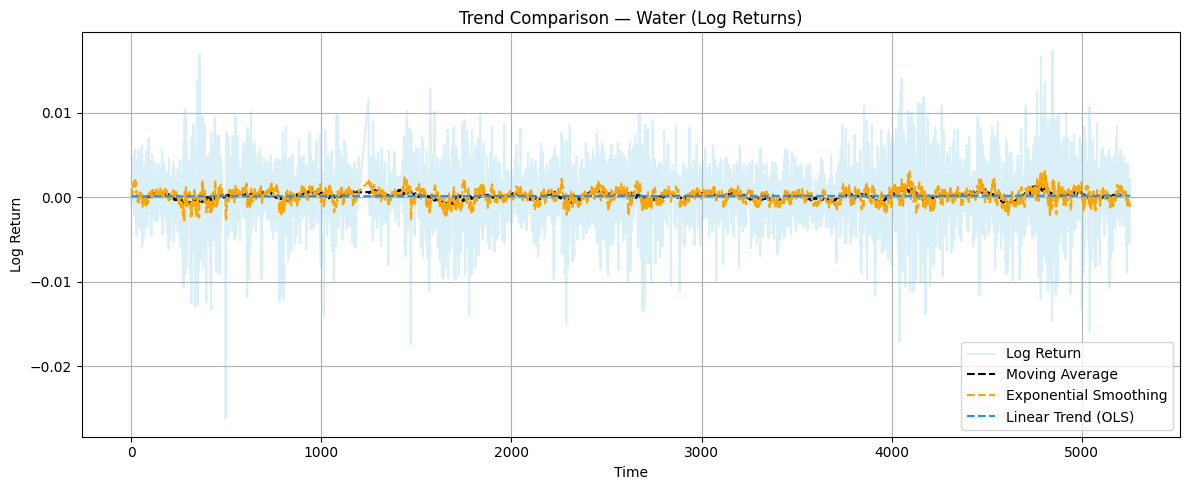

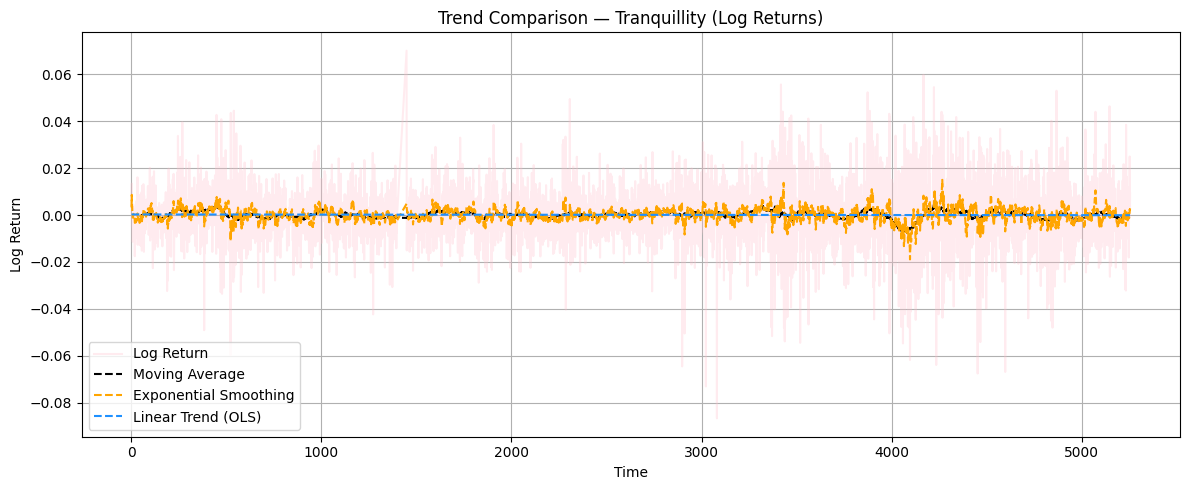

In [33]:
# Smoothing parameters
ma_window = 90         # 3-month window
ewma_alpha = 0.1       # smoothing factor for exponential
ols_trend_length = 5256 

# Apply trend analysis
for column, color in colours.items():
    series = df[column].dropna()
    log_return = np.log(series / series.shift(1)).dropna()

    # Time index for trend modeling
    x = np.arange(len(log_return)).reshape(-1, 1)

    # Linear regression (least squares)
    model = LinearRegression()
    model.fit(x[-ols_trend_length:], log_return[-ols_trend_length:])
    ols_trend = model.predict(x)

    # Moving Average
    ma_trend = log_return.rolling(window=ma_window, center=True).mean()

    # Exponential Weighted Moving Average
    ewma_trend = log_return.ewm(alpha=ewma_alpha).mean()

    # Plot all together
    plt.figure(figsize=(12, 5))
    plt.plot(log_return.index, log_return, label='Log Return', color=color, alpha=0.3)
    plt.plot(log_return.index, ma_trend, label='Moving Average', linestyle='--', color='black')
    plt.plot(log_return.index, ewma_trend, label='Exponential Smoothing', linestyle='--', color='orange')
    plt.plot(log_return.index, ols_trend, label='Linear Trend (OLS)', linestyle='--', color='dodgerblue')

    plt.title(f"Trend Comparison — {column.capitalize()} (Log Returns)")
    plt.xlabel("Time")
    plt.ylabel("Log Return")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
